<a id='step_0'></a><h3>  Оглавление</h3>


[1. Описание и цель проекта](#step_1)      
[2. Загрузка данных и подготовка их к анализу   ](#step_2)     
[3. Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии](#step_3)   
[3.1 Функция для создания пользовательских профилей](#step_3.1)   
[3.2 Функция для расчёта удержания](#step_3.2)  
[3.3 Функция для расчёта конверсии](#step_3.3)    
[3.4 Функция для расчёта LTV и ROI](#step_3.4)   
[3.5 Функция для сглаживания фрейма](#step_3.5)  
[3.6 Функция для визуализации удержания](#step_3.6)  
[3.7 Функция для построения графика конверсии и ее визуализации](#step_3.7)  
[3.8 Функция для создания пользовательских профилей](#step_3.8)   
[4. Исследовательский анализ данных ](#step_4)    
[4.1 Профили пользователей. Минимальная и максимальная даты привлечения пользователей.](#step_4.1)   
[4.2 Таблица, отражающая количество пользователей, покупателей и долю платящих пользователей по странам.](#step_4.2)    
[4.3 Таблица, отражающая количество пользователей, покупателей и долю платящих пользователей для каждого устройства.](#step_4.3)   
[4.4 Таблица, отражающая количество пользователей, покупателей и долю платящих пользователей для каждого канала привлечения.](#step_4.4)  
[5. Маркетинг](#step_5)    
[6. Оцените окупаемость рекламы](#step_6)  
[7. Конверсия и удержание по макрорегионам](#step_7)  
[8. Напишите выводы](#step_8)   
  

<a id='step_1'></a><h3>1. Описание и цель проекта</h3>

[К плану работ](#step_0)

Я — **маркетинговый аналитик** развлекательного приложения Procrastinate Pro+. **Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки**.   

<span style="color:red">__Моя цель:__</span>

- ___разобраться в причинах и помочь компании выйти в плюс.___   

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:   
 - лог сервера с данными об их посещениях,   
 - выгрузка их покупок за этот период,   
 - рекламные расходы.   
 
<span style="color:red">__Нам предстоит изучить:__</span>   

 - ___откуда приходят пользователи и какими устройствами они пользуются,___
 
 - ___сколько стоит привлечение пользователей из различных рекламных каналов;___
 
 - ___сколько денег приносит каждый клиент,___
 
 - ___когда расходы на привлечение клиента окупаются,___
 
 - ___какие факторы мешают привлечению клиентов. ___  
 
<span style="color:red">__**Описание данных**__</span>    

В вашем распоряжении три датасета.  

Файл ***visits_info_short.csv*** хранит лог сервера с информацией о посещениях сайта,   

***orders_info_short.csv*** — информацию о заказах,     
а ***costs_info_short.csv*** — информацию о расходах на рекламу.   

Структура ***visits_info_short.csv***:    

***User Id*** — уникальный идентификатор пользователя,  
***Region*** — страна пользователя,    
***Device*** — тип устройства пользователя,   
***Channel*** — идентификатор источника перехода,   
***Session Start*** — дата и время начала сессии,   
***Session End ***— дата и время окончания сессии.    

Структура ***orders_info_short.csv***:  

***User Id*** — уникальный идентификатор пользователя,   
***Event Dt*** — дата и время покупки,   
***Revenue*** — сумма заказа.   

Структура ***costs_info_short.csv***:   

***dt*** — дата проведения рекламной кампании,   
***Channel*** — идентификатор рекламного источника,   
***costs*** — расходы на эту кампанию.   

<a id='step_2'></a><h3>2. Загрузка данных и подготовка их к анализу</h3>

[К плану работ](#step_0)

#### Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`.
- заказы: `/datasets/orders_info_short.csv`. 
- расходы: `/datasets/costs_info_short.csv`. 

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import time
from datetime import datetime
from datetime import date, timedelta as td
from datetime import timedelta 
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Загружаем данные
try:
#визиты: 
    visits = pd.read_csv('/datasets/visits_info_short.csv')
#заказы: 
    orders = pd.read_csv('/datasets/orders_info_short.csv')
#расходы: 
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    pd.read_csv('https://$$$.yandex.net/datasets/visits_info_short.csv')
    pd.read_csv('https://$$$.yandex.net/datasets/orders_info_short.csv')
    pd.read_csv('https://$$$.yandex.net/datasets/costs_info_short.csv')



In [3]:
# выводим на экран информацию о таблицах и их первые 5 строк
display(visits.info())
display(costs.info())
display(orders.info())
display(visits.head(5))
display(orders.head(5))
costs.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [4]:
# приводим названия колонок к нижнему регистру
visits.columns = map(str.lower, visits.columns)
orders.columns = map(str.lower, orders.columns)
costs.columns = map(str.lower, costs.columns)
# выводим на экран количество дубликатов и пропусков
print('количество дубликатов - визиты/расходы/заказы')
display(visits.duplicated().sum())
display(costs.duplicated().sum())
display(orders.duplicated().sum())
print('количество пропусков - визиты/расходы/заказы')
display(visits.isna().sum())
display(costs.isna().sum())
display(orders.isna().sum())

количество дубликатов - визиты/расходы/заказы


0

0

0

количество пропусков - визиты/расходы/заказы


user id          0
region           0
device           0
channel          0
session start    0
session end      0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64

user id     0
event dt    0
revenue     0
dtype: int64

In [5]:
#  переименовываем колонки в соответствии с переменными в функциях
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders.columns = ['user_id', 'event_dt', 'revenue']
costs.columns = ['dt', 'channel', 'costs']
# меняем формат данных на временной
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [6]:
# выводим на экран информацию о таблицах повторно после преобразований
display(visits.info())
display(costs.info())
display(orders.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

###### Вывод: 
данные загружены и предобработаны, дубликатов нет.  
нужные форматы данных заданы - visits['session_start'], visits['session_end'], orders['event_dt'], costs['dt']  
переименованы столбцы на те же что и в функциях.

<a id='step_3'></a><h3>3. Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии.</h3>

[К плану работ](#step_0)


В данном учебном проекте разрешается использовать функции, с которыми познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

<a id='step_3.1'></a><h3>3.1 Функция для создания пользовательских профилей</h3>

[К плану работ](#step_0)

In [7]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

<a id='step_3.2'></a><h3>3.2 Функция для расчёта удержания</h3>

[К плану работ](#step_0)

In [8]:
# функция для расчёта удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


<a id='step_3.3'></a><h3>3.3 Функция для расчёта конверсии</h3>

[К плану работ](#step_0)

In [9]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

<a id='step_3.4'></a><h3>3.4 Функция для расчёта LTV и ROI</h3>

[К плану работ](#step_0) 

In [10]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 3. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 4. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 5. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 6. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 7. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )


<a id='step_3.5'></a><h3>3.5 Функция для сглаживания фрейма</h3>

[К плану работ](#step_0)

In [11]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 



<a id='step_3.6'></a><h3>3.6 Функция для визуализации удержания</h3>

[К плану работ](#step_0)

In [12]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

<a id='step_3.7'></a><h3>3.7 Функция для построения графика конверсии и ее визуализации</h3>

[К плану работ](#step_0) 

In [13]:
    
# для построения графика конверсии,
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

<a id='step_3.8'></a><h3>3.8 Функция для создания пользовательских профилей</h3>

[К плану работ](#step_0)  

In [14]:
#plot_ltv_roi #— для визуализации LTV и ROI.
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(22, 12))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Вывод:
Функции для конверсии, удержания, накопленной прибыли и стоимости привлечения пользователей и их графиков загружены и готовы к использованию

<a id='step_4'></a><h3>4. Исследовательский анализ данных</h3>

[К плану работ](#step_0)   
Для исследования наших данных выполним следующие действия:
- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.  
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. -Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.  
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.  
- Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.  


<a id='step_4.1'></a><h3>4.1 Профили пользователей. Минимальная и максимальная даты привлечения пользователей.</h3>

[К плану работ](#step_0) 

In [15]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5)) 
profiles.info()
display(profiles.duplicated().sum())
display(profiles.isna().sum())


    user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000  
3 2019-08-01  False          0.988235  
4 2019-10-01  False          0.230769  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64        

0

user_id             0
first_ts            0
channel             0
device              0
region              0
dt                  0
month               0
payer               0
acquisition_cost    0
dtype: int64

Получили профили и проверили на всякий случай дубликаты и пропуски

In [16]:
#минимальная и максимальная даты привлечения пользователей.
min = profiles['first_ts'].min()
max = profiles['first_ts'].max()
print(f"минимальная дата привлечения пользователей, {min}.")
print(f"максимальная дата привлечения пользователей, {max}.")

минимальная дата привлечения пользователей, 2019-05-01 00:00:41.
максимальная дата привлечения пользователей, 2019-10-27 23:59:04.


Минимальную и максимальную дату привлечения определили, назначаем момент и горизонт анализа

In [17]:
observation_date = max.date()  # момент анализа 
horizon_days = 14  # горизонт анализа 
print(' момент анализа ', observation_date)
print(' горизонт анализа ', horizon_days)

 момент анализа  2019-10-27
 горизонт анализа  14


#### Вывод:
мы создали таблицу профилей пользователей, определили максимальную дату привлечения пользователей - 27 октября 20019 года - она же observation_date и минимальную дату привдечения пользователей - 1 мая 2019 года
и задали горизонт анализа 14 дней

Имея готовые профили пользователей, легко узнать **количество привлечённых посетителей из каждой страны**. Достаточно сгруппировать профили 
по региону и посчитать количество уникальных ID функцией nunique(), далее сортируем по количеству пользователей в убывающем порядке

<a id='step_4.2'></a><h3>4.2 Таблица, отражающая количество пользователей, покупателей и долю платящих пользователей по странам.</h3>

[К плану работ](#step_0) 

In [18]:
region_payer_table = profiles.pivot_table(
    index='region', values='payer', aggfunc=['count', 'sum', 'mean']).sort_values(by=[('mean', 'payer')], ascending=False)

region_payer_table.sort_values(by=[('mean', 'payer')], ascending=False).style.format({'relation': '{:.2f}%'})
region_payer_table.columns = ['users_total', 'payers_total', 'relation,%'] # переименовываем колонки
region_payer_table['relation,%'] = 100*region_payer_table['relation,%'] # конверсия посетителей в покупатели в %
print('Количество привлечённых посетителей покупателй из каждой страны')
region_payer_table


Количество привлечённых посетителей покупателй из каждой страны


users_total  payers_total  relation,%
region                                              
United States       100002          6902    6.901862
Germany              14981           616    4.111875
UK                   17575           700    3.982930
France               17450           663    3.799427

###### Выводы  
Безусловным **лидером по количеству посетителей и покупателей является США** (это вполне естественно - они нация потребителей - даже если суммарно сложить всех пользователей прочих стран мы едва получим половину от всех пользователей Штатов, при этом и доля покупателей и Америки самая высокая и с отрывом от остальных стран). На втором месте **по посетителям** UK, на третьем France, **на последнем - Germany**. На втором, третьем и четвертом местах по покупателям - распределение аналогично. Однако **по доле конвертации из посетителей в покупатели - Германия на втором месте** после США, Великобритания и Франция на третьем и четвертом местах соответственно.  
**Лидерами по конвертации** посетителей в покупателей  являются **США и Германия**. Причем Германия среди Европейских стран лидер в такой конвертации. Немцы меньше смотрят, и больше покупают(в отличии от UK и France) - никакой ветренности, сплошной немецкий прагматизм.

<a id='step_4.3'></a><h3>4.3 Таблица, отражающая количество пользователей, покупателей и долю платящих пользователей для каждого устройства.</h3>

[К плану работ](#step_0)  

In [19]:
device_payer_table = profiles.pivot_table(
    index='device', values='payer', aggfunc=['count', 'sum', 'mean']).sort_values(by=[('mean', 'payer')], ascending=False)

device_payer_table.sort_values(by=[('mean', 'payer')], ascending=False).style.format({'relation': '{:.2f}%'})
device_payer_table.columns = ['users_total', 'payers_total', 'relation,%']
device_payer_table['relation,%'] = 100*device_payer_table['relation,%']
device_payer_table#  таблица с разбивкой по девайсам

users_total  payers_total  relation,%
device                                        
Mac            30042          1912    6.364423
iPhone         54479          3382    6.207897
Android        35032          2050    5.851793
PC             30455          1537    5.046790

###### Выводы
**Больше всего посетителей заходит с iPhone и Android, соответственно и покупателей** больше всего с этих двух устройств. Однако, в процентном соотношении **доля людей перешедших из разряда посетителей в покупатели максимальная на устройствах Mac**. Далее по степени уменьшения конвертации посетителей в покупатели идут iPhone, Android и PC.
Можно сделать вывод о том, что мобильные устройства легко привлекают посетителей - потому что количество времени которое люди проводят просматривая экран смартфона скорее всего выше чем компьютеров и планшетов. Максимальная конвертация в плательщиков у владельцев Mac - объясняется просто - все владельцы дорогих комрьютеров фирмы Apple - весьма занятые и состоятельные люди. Если им что-то надо, они заходят, выбираю и платят. Хуже всего обстоят дела у пользователей девайсов PC - это олдскульные персональные компьютеры, владельцы их не слишком платежеспособны, консервативны и, что вполне вероятно являются пользователями мобильных устройств параллельно.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Все верно! Тут исходя из лидирования Apple, которое конечно может быть обусловлено и состоятельностью пользователей, хорошо было бы посмотреть, а может это как-то связано со странами? Логично было бы предположить, что пользуются "яблочными" устройствами в Америке, но так-ли это? 😊 </div>

<a id='step_4.4'></a><h3>4.4 Таблица, отражающая количество пользователей, покупателей и долю платящих пользователей для каждого канала привлечения.</h3>   

[К плану работ](#step_0)  

In [20]:
channel_payer_table = profiles.pivot_table(
    index='channel', values='payer', aggfunc=['count', 'sum', 'mean']).sort_values(by=[('mean', 'payer')], ascending=False)

channel_payer_table.sort_values(by=[('mean', 'payer')], ascending=False).style.format({'relation': '{:.2f}%'})
channel_payer_table.columns = ['users_total', 'payers_total', 'relation,%']
channel_payer_table['relation,%'] = 100*channel_payer_table['relation,%']

#channel_payer_table1['channel'] = channel_payer_table['channel']
channel_payer_table1 =channel_payer_table
channel_payer_table1# таблица с разбивкой по каналам

users_total  payers_total  relation,%
channel                                                  
FaceBoom                  29144          3557   12.204914
AdNonSense                 3880           440   11.340206
lambdaMediaAds             2149           225   10.469986
TipTop                    19561          1878    9.600736
RocketSuperAds             4448           352    7.913669
WahooNetBanner             8553           453    5.296387
YRabbit                    4312           165    3.826531
MediaTornado               4364           156    3.574702
LeapBob                    8553           262    3.063253
OppleCreativeMedia         8605           233    2.707728
organic                   56439          1160    2.055316

Доля платящих для каждого канала привлечения


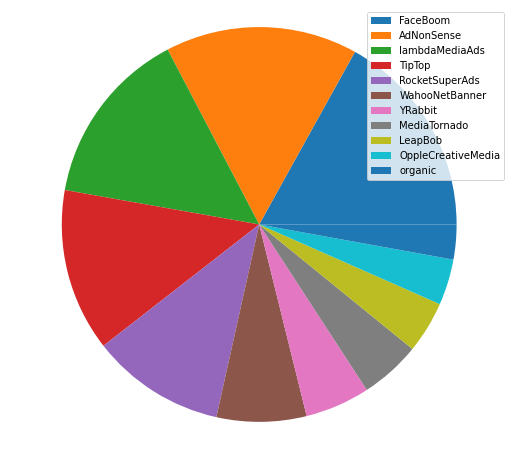

                    users_total  payers_total  relation,%
channel                                                  
FaceBoom                  29144          3557   12.204914
AdNonSense                 3880           440   11.340206
lambdaMediaAds             2149           225   10.469986
TipTop                    19561          1878    9.600736
RocketSuperAds             4448           352    7.913669
WahooNetBanner             8553           453    5.296387
YRabbit                    4312           165    3.826531
MediaTornado               4364           156    3.574702
LeapBob                    8553           262    3.063253
OppleCreativeMedia         8605           233    2.707728
organic                   56439          1160    2.055316


In [21]:
print('Доля платящих для каждого канала привлечения')

#круговая диаграмма
plt.figure(figsize=(9, 8))
values = channel_payer_table1['relation,%']
plt.pie(values)
plt.legend(['FaceBoom', 'AdNonSense', 'lambdaMediaAds','TipTop', 'RocketSuperAds', 'WahooNetBanner', 'YRabbit', 'MediaTornado', 'LeapBob', 'OppleCreativeMedia', 'organic'])
plt.axis('equal')
plt.show()
print(channel_payer_table1)


###### Выводы
**максимально количество посетителей дал органический канал** привлечения посетителей, **однако конвертация** в плательщиков таких посетителей **всего 2%**. Поскольку компания ничего за таких посетителей не платит, то и эти покупатели важны, тем более что **по количеству покупателей канал organic на третьем месте** - это свидетельствует об интересе людей в интернете тематикой того что предлагает компания (профессиональная прокастинация - вполне вероятно что многие лди страдают отсутствием мотивации в жизни и ищут способы преодолеть прокастинацию, параллельно с поиском информации они получают предложение компании, и соответственно - покупают).**Второй по привлечению посетителей канал - это FaceBoom** - реклама в нем дает второй по значимости приток посетителей на сайт **и первый по количеству притока покупателей**. Соответственно **конверсия 12,2% - весьма высока** и по этому показателю FaceBoom на первом месте. **Третьим по количеству посетителей и по количеству покупателей канал TipTop**. Однако **по уровню конвертации этот канал лишь на 4-м месте - 9,6%**. На **втором месте по конвертации посетителей в покупателей стоит компания AdNonSense**, но количество посетителей в ней занимает 9-е место, а количестве покупателей - пятое - следовательно предположим, что **это один из перспективных каналов привлечения покупателей**. **lambdaMediaAds - конверсия этого канала занимает 3-е место** - тоже перспективная, но по количеству привлеченных посетителей и покупателей - эта компания занимает послединие места, есть вероятность что высокая конверсия просто связана с небольшой выборкой посетителей. **RocketSuperAds - канал на 5-м месте по уровню конверсии посетителей в покупатели**, по количеству привлечения посетителей и покупателей он в середине рейтинга, поэтому **будем тоже считать это канал перспективным**. Два платных канала привлечения посетителей и покупателей **OppleCreativeMedia и LeapBob** имеют конверсию в покупатели в районе погрешности 3% - это **явные аутсайдеры на размещение у них рекламы**. YRabbit	и MediaTornado - лидеры антирейтинга привлечения покупателей, возможно из-за недофинансированности - их можно смело занести в аутсайдеры, перспективность размещения рекламы на этих каналах стремится к нулю на первый взгляд. WahooNetBanner - на 6-м месте по конвертации посетителей в покупателей, она ниже чем у TipTop почти в 2 раза, судя по всему  страрый канал - взрослая платежеспособная аудитория, но охват недостаточен.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> По каналам доли также посчитаны безошибочно, и добавила в частности хорошие предположения по органике, отметив при этом все каналы из таблицы в абсолютном и относительном отношении </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Для еще бОльшей наглядности к каждому описанию доли платящих можно добавить столбчатые графики, ведь менеджеру будет удобнее посмотреть еще и на визуализацию доли в каждом случае. Спринт по визуализации данных еще предстоит в твоем обучении, но могу посоветовать тебе такой сайт, там ты сможешь найти много нового о визуализации, это к тому же еще и хорошая шпаргалка для следующих проектов:
    
* https://www.python-graph-gallery.com
    

<div class="alert alert-info"> <b>Комментарий студента:</b> Сделано, не получилось подписать сектора</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Они фактически подписаны по цветам. Чтобы подписать их более наглядно, посоветую воспользоваться библиотекоц plotly express. Если не получиться, то далее в обучении будет спринт по визуализации данных, там будет детальное обучение по форматированию графиков)

Также мы можем бонусом построить графики, отображающие динамику привлечения новых пользователей по каждому из регионов, девайсов и каналов привлечения. Применим метод plot()

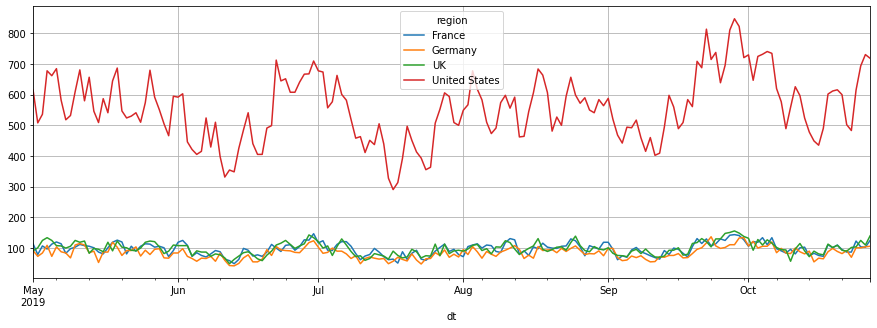

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='region',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

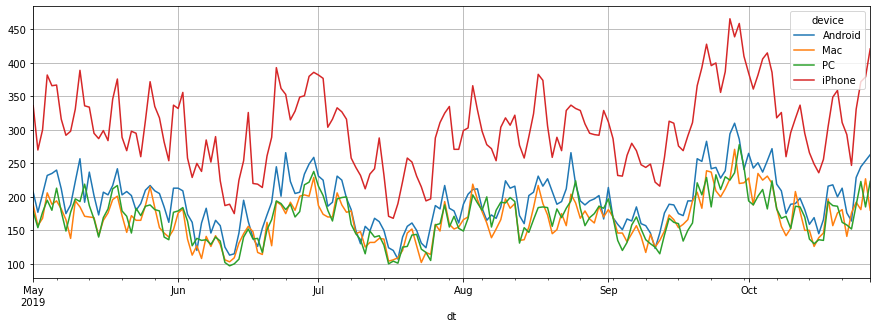

In [23]:
profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='device',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

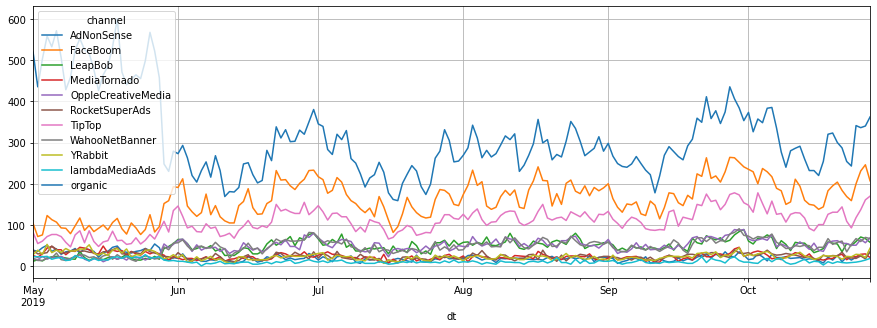

In [24]:
profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

Вывод: графики показывают схожую между собой динамику, это свидетельствует о взаимовлиянии рекламных компаний или о доминировании отдельных каналов. Привлечение ничто - платежеспособность всё!

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> А вот это хорошие и полезные графики, только у них чуть лучше было бы подписать ось Y и добавить заголовки, сейчас не совсем очевидно за что именно отвечает каждый график

### Шаг 4. Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Посчитайте общую сумму расходов на маркетинг

In [25]:
costs_sum = costs['costs'].sum().round()
costs_sum

105497.0

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Определили общую сумму трат </div>

Посчитаем заодно и полую сумму покупок в датасете

In [26]:
orders['revenue'].sum()

215962.88

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И общую сумму выручки, тут все верно </div>

#### Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник

In [27]:
channel_costs_table = pd.DataFrame()
channel_costs_table['costs'] = costs.groupby('channel')['costs'].sum()
channel_costs_table['relation,%'] = 100 * channel_costs_table['costs'] / costs_sum
channel_costs_table.sort_values(by='costs', ascending=False)

costs  relation,%
channel                                 
TipTop              54751.30   51.898443
FaceBoom            32445.60   30.754998
WahooNetBanner       5151.00    4.882603
AdNonSense           3911.25    3.707451
OppleCreativeMedia   2151.25    2.039158
RocketSuperAds       1833.00    1.737490
LeapBob              1797.60    1.703935
lambdaMediaAds       1557.60    1.476440
MediaTornado          954.48    0.904746
YRabbit               944.22    0.895021

##### Выводы
**Максимум расходов на рекламу компания сделала через сеть TipTop**, на **втором месте канал FaceBoom**, на **третьем WahooNetBanner**. Причем **первые 2** строчки получили львиную долю финансирования **порядка 80%**. WahooNetBanner - 4.88% и AdNonSense - 3.71% - идут на 3-м и 4-м местах, но уровень вложений в эти каналы на порядок меньше. Остальные каналы имеют долю финансирования менее 3% - скорее всего вложения в них имели целью протестировать отдачу. Полная **сумма рекламных вложений - 105 497** - весьма внушительный бюджет. Заработала же компания лишь 215 963 - чуть больше чем 100% сверху. Если отнять операционные расходы компании - не уверена что владельцы и инвесторы остались довольны результатом.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо, что помимо расчета сумм дополнила еще и расчетом доли от общего, так отличие двух каналов стало еще заметнее. Согласен, с операционкой верятнее всего показатели довольно негативные </div>

#### Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 
Постарайтесь отразить это на одном графике.

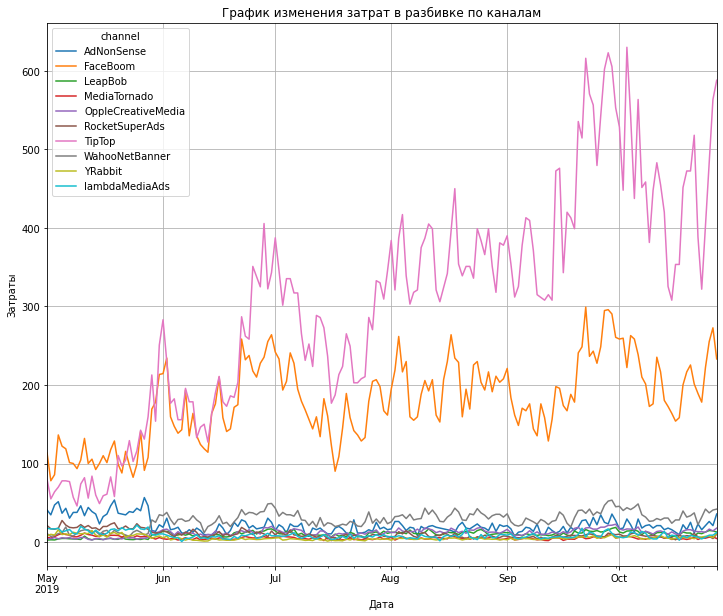

In [28]:
filtered_data = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(12, 10),
           grid=True,)

plt.title('График изменения затрат в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

In [29]:
costs['dt_month'] = pd.to_datetime(costs['dt']).dt.month
costs['dt_week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs.head()

dt   channel  costs  dt_month  dt_week
0 2019-05-01  FaceBoom  113.3         5       18
1 2019-05-02  FaceBoom   78.1         5       18
2 2019-05-03  FaceBoom   85.8         5       18
3 2019-05-04  FaceBoom  136.4         5       18
4 2019-05-05  FaceBoom  122.1         5       18

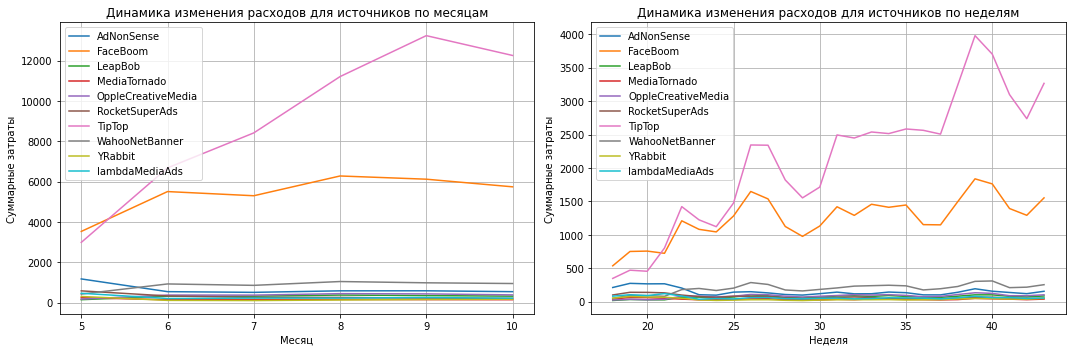

In [30]:
plt.figure(figsize = (15,5))
#график 1
ax1 = plt.subplot(1,2,1)
costs_pivot = costs.pivot_table(index='dt_month', columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=True, ax = ax1)
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Суммарные затраты')
plt.title('Динамика изменения расходов для источников по месяцам')

#график 2
ax2 = plt.subplot(1,2,2)
costs_pivot = costs.pivot_table(index='dt_week', columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=True, ax = ax2)
plt.legend()
plt.xlabel('Неделя')
plt.ylabel('Суммарные затраты')
plt.title('Динамика изменения расходов для источников по неделям')

plt.tight_layout()
plt.show()

##### Выводы 
**Существенно росли затраты на рекламу в основном в TipTop**, большую долю "съедал" канал FaceBoom. Канал lambdaMediaAds - реклама была сокращена через месяц, WahooNetBanner - реклама стабильно была выше чем в остальных каналах кроме перечисленных. Складывается ощущение что в исследуемый период была битва за рекламный бюджет компании Procrastinate Pro+ первых 2-х каналов и TipTop - победил. Интересно, почему нет данных по продажам в Китай, ведь это, судя по всему, китайская сеть.
График с разбивкой по месяцам и по неделям показал что летние месяцы рекламные расходы были стабилизированы даже в TipTop и FaceBoom, резкий рост затрат на этих каналах произошел в сентябре - видимо с окончанием сезона отпусков и началом учебного года и сезона деловой активности. Однако, скорее всего именно всплеск сентябрьской маркетинговой активности и "подкосил" окупаемость рекламных расходов.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Всё наглядно, тут видно как сильно отличаются и как плюс ко всему еще и росли траты по двум каналам. По Китаю данных скорее всего нет просто потому что мы не запускали приложение в этой стране или не адаптировали его под китайский рынок</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Только посмотри на само ТЗ по проекту:
    
* Постройте визуализацию динамики изменения расходов во времени <b>(по неделям и месяцам)</b> по каждому источнику. Постарайтесь отразить это на одном графике.
    
То есть тут по заданию все же нужно было построить два графика: по месяцам и по неделям. Для большей и меньшей гранулярности

<div class="alert alert-info"> <b>Комментарий студента:</b> Сделано</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Правильно, оба графика добавлены

#### Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 
Используйте профили пользователей

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Органика для расчета САС не пригодится</div>

In [31]:
#Посмотрим на CAC для каждого источника трафика.

cac_from_channel = pd.DataFrame()
profiles_1 = profiles.query('channel != "organic"')
# нам интересны только те пользователи которые купили, поэтому канал органик исключим
cac_from_channel['acquisition_cost_median'] = profiles_1.groupby('channel')['acquisition_cost'].median()
# посчитаем медианное значение затрат по каналам

cac = cac_from_channel.sort_values(by='acquisition_cost_median', ascending=False)#.style.format({'acquisition_cost_median': '{:.2f}'})
display(channel_payer_table)
display(cac) 

channel_payer_table = channel_payer_table.query('channel != "organic"') 

channel_payer_table= channel_payer_table.merge(cac['acquisition_cost_median'], on=['channel'],how='left')
channel_payer_table.head()

#channel_payer_table['acquisition_cost_median'] = [1.11, 1.00, 0.73, 3.00, 0.40, 0.60, 0.21, 0.22, 0.21, 0.25]
#channel_payer_table= channel_payer_table.merge(cac[['channel', 'acquisition_cost_median']], on=['channel'],how='left')
#channel_payer_table.sort_values(by='acquisition_cost_median',ascending=False)
# соотношение процента конвертации в покупателей к стоимости привлечения cac 
channel_payer_table['relation,%'] = 100*channel_payer_table['payers_total']/channel_payer_table['users_total']
# создаем столбец 'effect', который показывает соотношение доли 
#привлеченных клиентов к затратам на привлечение, он показывает эффективность затрат на привлечение
channel_payer_table['effect'] = channel_payer_table['relation,%']/channel_payer_table['acquisition_cost_median']
channel_payer_table.sort_values(by='effect',ascending=False)

users_total  payers_total  relation,%
channel                                                  
FaceBoom                  29144          3557   12.204914
AdNonSense                 3880           440   11.340206
lambdaMediaAds             2149           225   10.469986
TipTop                    19561          1878    9.600736
RocketSuperAds             4448           352    7.913669
WahooNetBanner             8553           453    5.296387
YRabbit                    4312           165    3.826531
MediaTornado               4364           156    3.574702
LeapBob                    8553           262    3.063253
OppleCreativeMedia         8605           233    2.707728
organic                   56439          1160    2.055316

acquisition_cost_median
channel                                    
TipTop                             3.000000
FaceBoom                           1.114667
AdNonSense                         1.004348
lambdaMediaAds                     0.733333
WahooNetBanner                     0.600000
RocketSuperAds                     0.404444
OppleCreativeMedia                 0.250000
MediaTornado                       0.220926
YRabbit                            0.214286
LeapBob                            0.210000

users_total  payers_total  relation,%  \
channel                                                     
RocketSuperAds             4448           352    7.913669   
YRabbit                    4312           165    3.826531   
MediaTornado               4364           156    3.574702   
LeapBob                    8553           262    3.063253   
lambdaMediaAds             2149           225   10.469986   
AdNonSense                 3880           440   11.340206   
FaceBoom                  29144          3557   12.204914   
OppleCreativeMedia         8605           233    2.707728   
WahooNetBanner             8553           453    5.296387   
TipTop                    19561          1878    9.600736   

                    acquisition_cost_median     effect  
channel                                                 
RocketSuperAds                     0.404444  19.566764  
YRabbit                            0.214286  17.857143  
MediaTornado                       0.220926  16.180517  
LeapBob                            0.210000  14.586917  
lambdaMediaAds                     0.733333  14.277254  
AdNonSense                         1.004348  11.291114  
FaceBoom                           1.114667  10.949384  
OppleCreativeMedia                 0.250000  10.830912  
WahooNetBanner                     0.600000   8.827312  
TipTop                             3.000000   3.200245

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Средние(медианные) траты по каналам посчитаны как надо, все правильно</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Только вот дополнительный столбец effect стоит как-то описать, сейчас менеджер не поймет что вообще он означает)

<div class="alert alert-info"> <b>Комментарий студента:</b> Сделано</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Отлично!

In [32]:
display(profiles['acquisition_cost'].median()) 
CAC_profiles = profiles.query('channel != ["TipTop", "organic"]')
CAC_profiles['acquisition_cost'].median()

0.24750000000000003

0.6142857142857143

##### Предваительные выводы:
**Компания** производящая приложение Procrastinate Pro+ **потратила почти 50% оборота на рекламу** в различных каналах, **максимум в TipTop**. Медианная **стоимость привлечения покупателей в этой сети в 3 раза превышает CAC во втором по бюджету канале FaceBoom**. Любо в компании маркетингом рулили китайские сотрудники, либо любители именно этой сети, либо 2019 год был пиком популярности именно этой сети. Есть еще версия что маркетологи были отностиельно молоды и не учли что Procrastinate - как мейнстрим интересна совсен не той возрастной аудитории, котрая присуща TipTop, а гораздо старше. Еще есть версия что этот канал был просто изначально переоценен по значимости. Насколько я знаю - реклама в TipTop стоит дорого, а отдачу приности небольшую. В любом случае маркетинговую политику надо менять в пользу более консервативных каналов, которые посещают люди интересующиеся прокастинацией. Медианная **стоимость привлечения одного покупателя без каналов TipTop и organic на 40% ниже чем с ними**.
Если оценить **процент конвертации в покупателей к затратам на привлечение** - то **самым выгодным каналом привлечения окажется RocketSuperAds**, также перспективными будут вложения в каналы **YRabbit, MediaTornado и LeapBob**. В данном случае мы не учитываем качество плательщиков из этих каналов а лишь их количество. Поэтому если компания нацелена на привлечение потока клиентов любыми доступными средствами, то текомендации остаются в силе. Если задача получить максимум прибыли из вложений, то исследование надо продолжить.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Все правильно и выглядит логично, самые дорогие каналы в абсолютном отношении имеют и самые высокие цены по привлечению клиентов, при этом хорошо дополнила само описание привязкой к реальному продукту и возможными причинами таких трат</div>

### Шаг 5. Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

- Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [33]:
# случай если мы считаем органических пользователей
observation_date = datetime.datetime(2019, 11, 1).date()
horizon_days = 14


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Установили время по заданию</div>

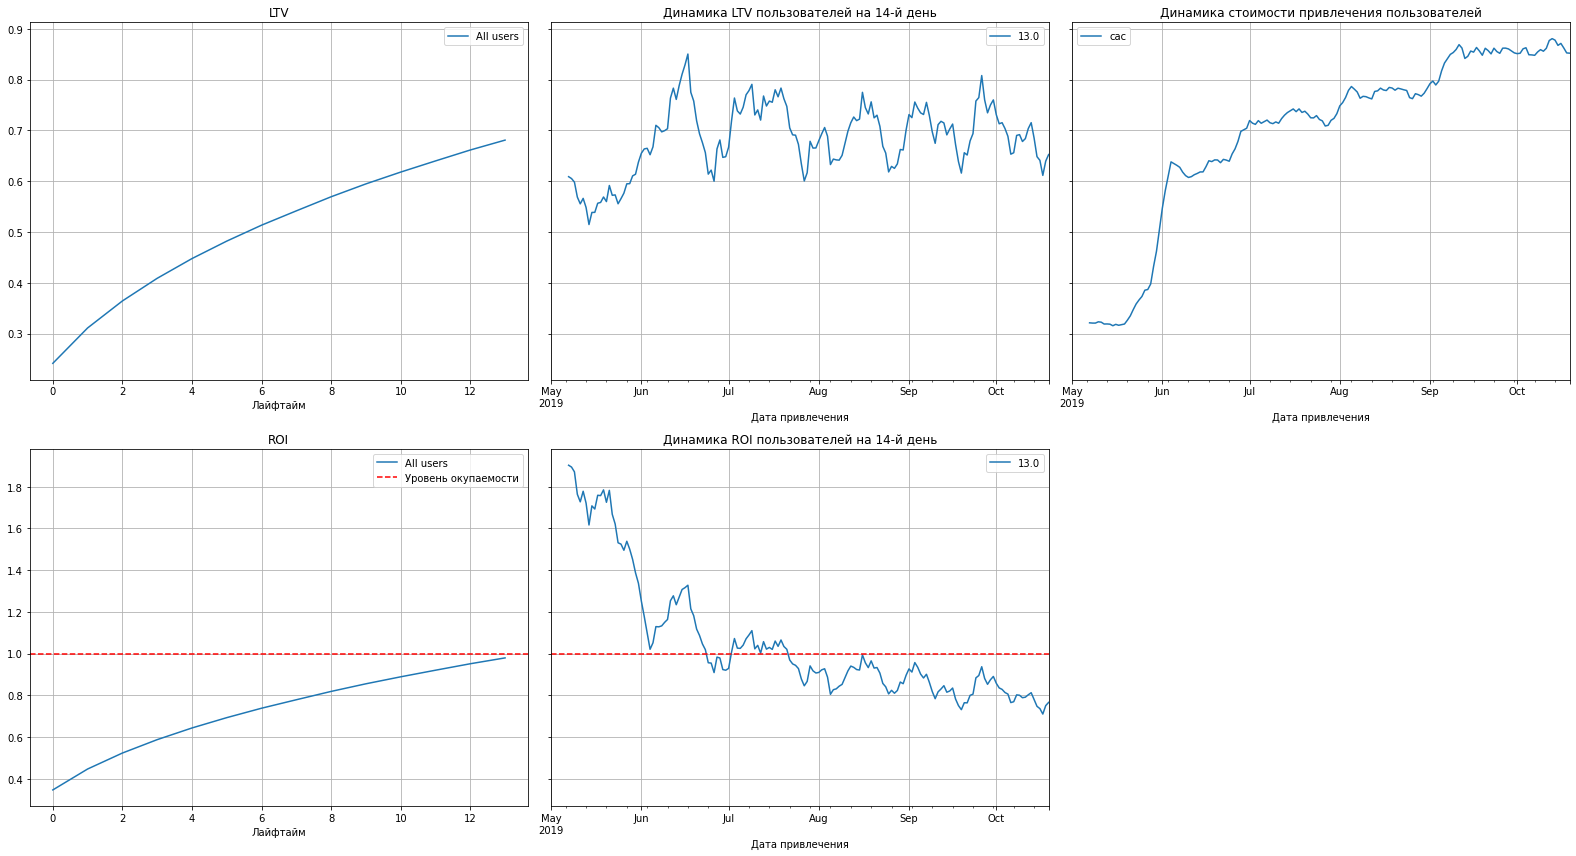

In [34]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Если рассматривать **случай с пользователями на которых не был затрачен рекламный бюджет**, то **окупаемость** рекламных вложений к 14-му дню лайфтайма **приблизилась к единице - достигла окупаемости**. Если смотреть в динамике ROI держалась выше уровня окупаемости до конца июня, "плавала" вокруг окупаемости до конца июля, потом пошла на снижение, минимальное значение в конце эксперимента 0,73. Интегральная ROI скорее всего будет равна окупаемости на 14-ый день, что и показал график ROI с лайфтаймами. Формально задание бизнес-плана выполнено, но с учетом бесплатно доставшихся органических покупателей. LTV в динамике колеблется относительно линии 0,7, САС в конце эксперимента 0,85. 
Могу предположить что компания только что выпустила приложение Procrastinate Pro+ и задача была сделать его максимально узнаваемым. Приставка Pro+ указывает на то, что это скорее всего не первая версия продукта, а релиз, возможно даже не первый.
Для узнаваемости приложения должны были выбрать самые известные каналы продвижения, самые популярные девайсы и самые платежеспособные регионы. Возможно еще и размещение рекламы на длительный период времени (оптом дешевле).
Однако в рамках этого проекта мы исследуем узкую задачу - рассмотреть эффективность рекламных вложений и их окупаемость по странам, девайсам и каналам, поэтому будем рассматривать вариант отсечения бесплатно пришедших покупателей через канал organic.
Наша задача дать рекомендации как потратить рекламный бюджет на предстоящий временной период и как настроить рекламную компанию более точно и эффективно. Кроме того скорее всего задача "узнаваемости" на предстоящий период не стоит, "поле засеяно, нужно собирать урожай" и желательно действовать максимально эффективно.
**Вывод: канал organic не рассматриваем**.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Такие предположения на правду очень даже похожи! Вероятно маркетологи решили пойти в ширину, а не в глубину и сделать упор на узнаваемости, это и есть та самая причина по которой у нас так много органики(хоть она и не очень здорово платит). Но тем не менее, проанализировать тут нужно было именнол рекламу, так что пойдем дальше без органики</div>

In [35]:
# случай если мы исключем органических пользователей
observation_date = datetime.datetime(2019, 11, 1).date()
#horizon_days = 14
ad_profiles = profiles.query('channel != "organic"')

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Время и горизонт мы уже указали выше, так что на самом деле можно было повторно их не указывать

<div class="alert alert-info"> <b>Комментарий студента:</b> Согласна</div>

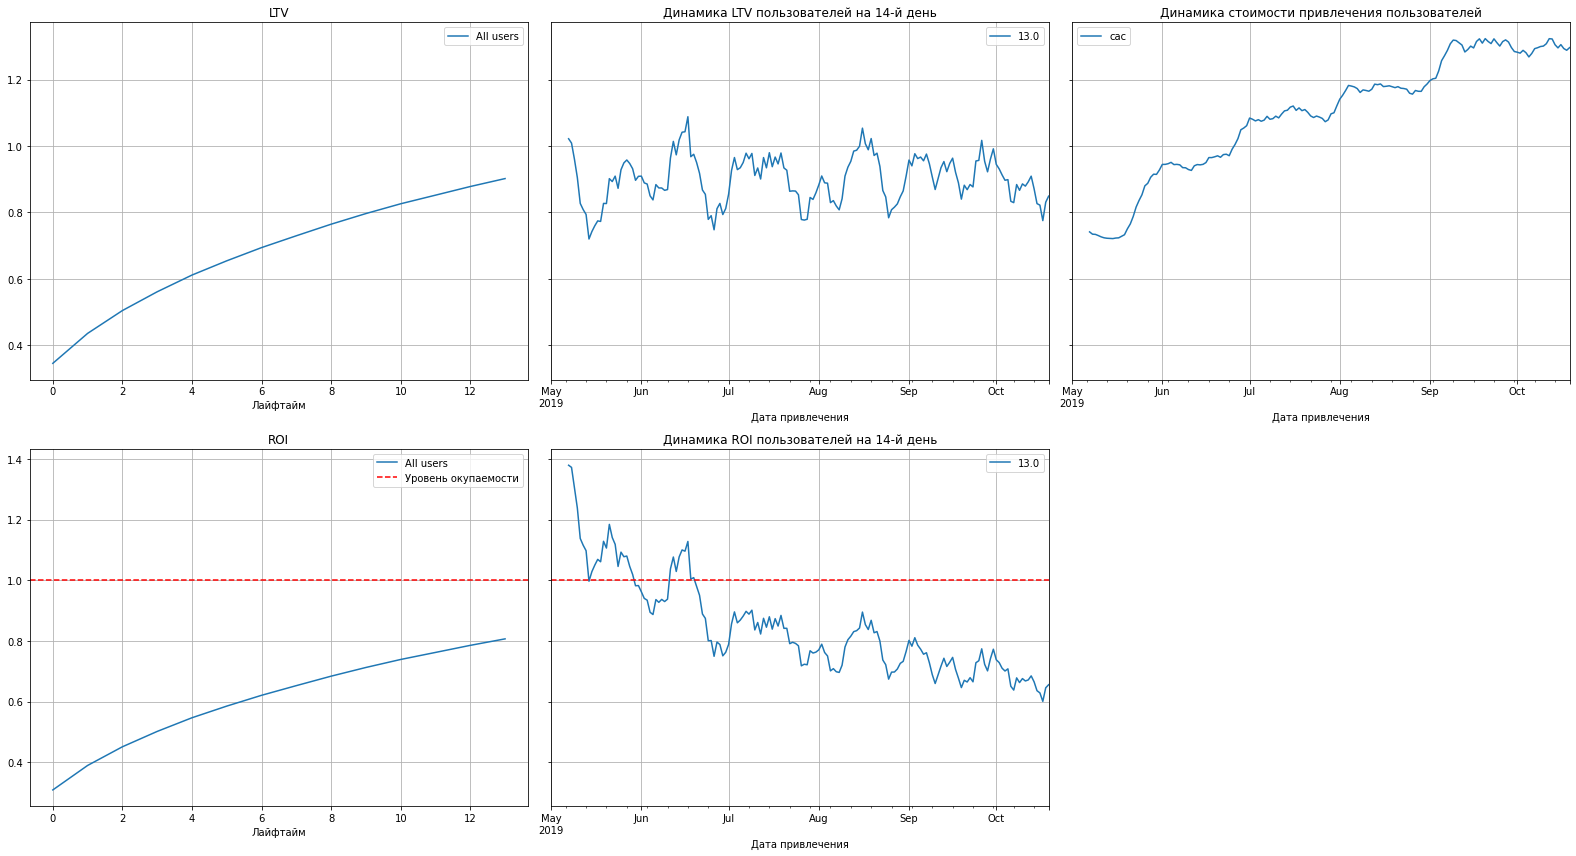

In [36]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 


**Второй вариант - исключили покупателей пришедших через канал organic**, результаты вложений ухудшились, но с точки зрения оценки эффективности вложений это правильно.  
По графикам можно сделать такие выводы:  
Реклама не окупается. ROI в конце 2-ой недели — чуть более 80%.  
CAC увеличился с 0,85 в начале до 1,33 в конце - это почти на 36%. Это однозначно должно повлиять на ROI, особенно если привлечение, удержание и качество покупателей не улучшится так же резко как и затраты на привлечение. Вероятно, **проблема может заключаться в бесконтрольном увеличении рекламного бюджета несмотря на отсутствие реакции рынка**. Допускаю мысль что маркетологи компании сделали это намеренно с прицелом на более длительный период отдачи инвестиций.
На LTV обычно влияет сезонный фактор, но в нашем случае этот показатель достаточно стабилен от 0,8 до 1. Значит, дело не в сезонности и не в изменении качества пользователей.
Динамика ROI - **инвестиции перестали окупаться уже в конце мая после резкого увеличения затрат на привлечение** пользователей в это же время, далее следует лишь один всплеск ROI в динамике - он приходится на середину июля, после **окупаемость инвестиций планомерно уходит в минус и достигают 0,6 в самой низкой точке**.
Продолжим исследование, и выясним как влияют регион, источник и девайс первого посещения на маркетинговые характеристики.


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Молодец, что заметила! И правда у кампании были моменты, когда ситуацию с окупаемостью можно было назвать положительной, но дальше все становилось только хуже и хуже и классно, особенно все плохо стало в последние месяцы</div>

#### Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Корректно обращаешься к необходимым функциям для построения графиков</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> По конверсии и удержанию еще можно построить таблицы, так некоторым менеджерам будет удобнее

<div class="alert alert-info"> <b>Комментарий студента:</b> Сделано</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Здорово!

cohort_size       0.0       1.0       2.0       3.0       4.0  \
dt                                                                          
2019-05-01          390  0.058974  0.066667  0.071795  0.071795  0.076923   
2019-05-02          323  0.058824  0.068111  0.068111  0.068111  0.068111   
2019-05-03          346  0.057803  0.069364  0.075145  0.078035  0.083815   
2019-05-04          457  0.070022  0.074398  0.076586  0.078775  0.085339   
2019-05-05          438  0.036530  0.043379  0.047945  0.052511  0.052511   

                 5.0       6.0       7.0       8.0       9.0      10.0  \
dt                                                                       
2019-05-01  0.076923  0.076923  0.079487  0.082051  0.082051  0.082051   
2019-05-02  0.068111  0.068111  0.068111  0.068111  0.068111  0.071207   
2019-05-03  0.083815  0.083815  0.083815  0.083815  0.083815  0.083815   
2019-05-04  0.085339  0.087527  0.089716  0.089716  0.091904  0.091904   
2019-05-05  0.052511  0.052511  0.052511  0.052511  0.052511  0.052511   

                11.0      12.0      13.0  
dt                                        
2019-05-01  0.082051  0.082051  0.082051  
2019-05-02  0.071207  0.071207  0.071207  
2019-05-03  0.083815  0.083815  0.086705  
2019-05-04  0.091904  0.091904  0.091904  
2019-05-05  0.052511  0.052511  0.052511

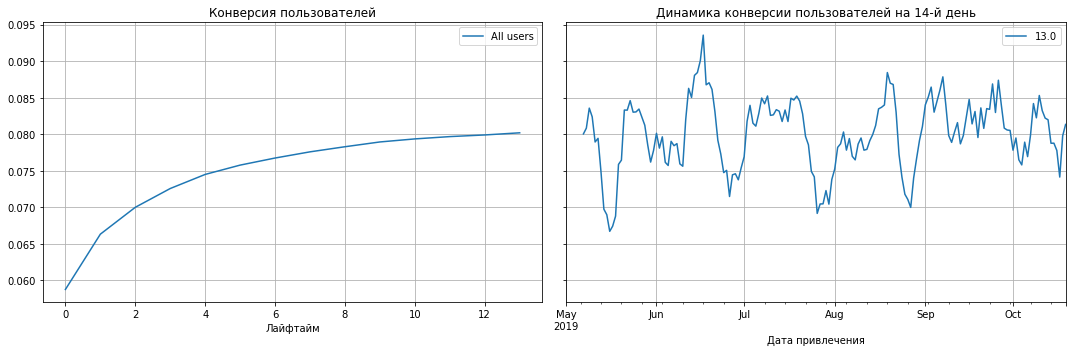

In [37]:
# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    ad_profiles, orders, observation_date, horizon_days
)
display(conversion_history.head(5))
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

###### Выводы
Судя по графикам - конверсия к 14-му дню растет и достигает значения - 0,8, однако **пляшущий график динамики конверсии показывает ее зависимость от рекламных акций (скорее всего)** - есть акция - высокая конверсия, нет акции - конверсия ниже. Очевидно что за период исследования наблюдается затухание амплитуды колебаний конверсии в 2 раза с 0,25 до 0,13. Это может означать что массированные вливания в рекламу дали коммулятивный эффект узнаваемости или, что тоже вероятно, бОльшие траты на рекламу дали бОльший приток покупателей. Тут мы не знаем продолжительость рекламных компаний, поэтому оценить более точно не представляется возможным.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, тут похоже было влияния больших вливаний средств, или возможно какие-то промо-активности</div>

#### Удержание пользователей
Проверим удержание пользователей и динамику его изменения. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель:

cohort_size    0         1         2         3         4  \
payer dt                                                                     
False 2019-05-01          358  1.0  0.212291  0.072626  0.061453  0.022346   
      2019-05-02          300  1.0  0.196667  0.103333  0.033333  0.030000   
      2019-05-03          315  1.0  0.180952  0.076190  0.066667  0.028571   
      2019-05-04          413  1.0  0.164649  0.101695  0.058111  0.024213   
      2019-05-05          412  1.0  0.191748  0.092233  0.065534  0.033981   

                         5         6         7         8         9        10  \
payer dt                                                                       
False 2019-05-01  0.011173  0.025140  0.011173  0.013966  0.008380  0.000000   
      2019-05-02  0.016667  0.023333  0.010000  0.006667  0.006667  0.010000   
      2019-05-03  0.028571  0.031746  0.015873  0.009524  0.003175  0.006349   
      2019-05-04  0.021792  0.014528  0.007264  0.021792  0.009685  0.012107   
      2019-05-05  0.021845  0.014563  0.019417  0.009709  0.000000  0.007282   

                        11        12        13  
payer dt                                        
False 2019-05-01  0.011173  0.002793  0.013966  
      2019-05-02  0.010000  0.016667  0.003333  
      2019-05-03  0.003175  0.006349  0.003175  
      2019-05-04  0.016949  0.002421  0.007264  
      2019-05-05  0.009709  0.012136  0.002427

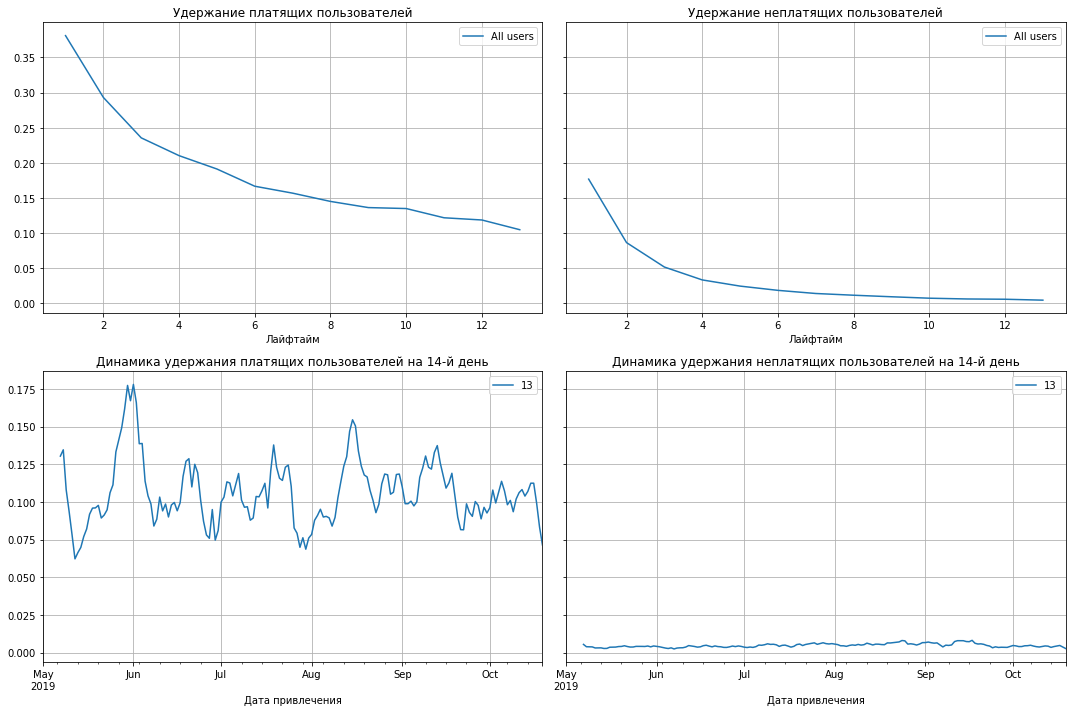

In [38]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    ad_profiles, visits, observation_date, horizon_days
)
display(retention_history.head(5))
plot_retention(retention_grouped, retention_history, horizon_days) 

###### Выводы
Удержание платящих пользователей заметно выше чем у органических - это ожидаемо и закономерно, **динамика удержания пользователей на 14-ый день колеблется** от 0,065 до 0,176 в начале иссследования и от 0,075 до 0,106 в конце исследования. **Амлитуда колебаний сократилась в 3,5 раза**. График удержания пользовалетелей практически повторяет график привлечения пользователей в небольшим временным лагом и одинаковым количеством вершин, что свидетельствует о чувствительности обоих графиков к рекламным вливаниям и к стабилизации привлечения и удержания покупателей при увеличении рекламного бюджета. Средний уровень примерно 0,11,  что есть небольшое затухание колебаний - заметного снижения на протяжении эксперимента нет. Ответа на вопрос- почему не окупается реклама мы из них не получили - смотрим дальше.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо связываешь возможные причины падения и роста конверсии и удержания в целом по кампании, и формируешь предположения об особенностях пользователей. Также, отмечена основная особенность, графики достаточно волнообразные и после начала пользования приложением клиенты довольно редко задерживаются в нем на длительное время. В то же время, по общей конверсии и удержанию сложно сделать какие-то точные выводы</div>

#### Проанализируйте окупаемость рекламы с разбивкой по устройствам. 
Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI: передадим параметру dimensions столбец device.

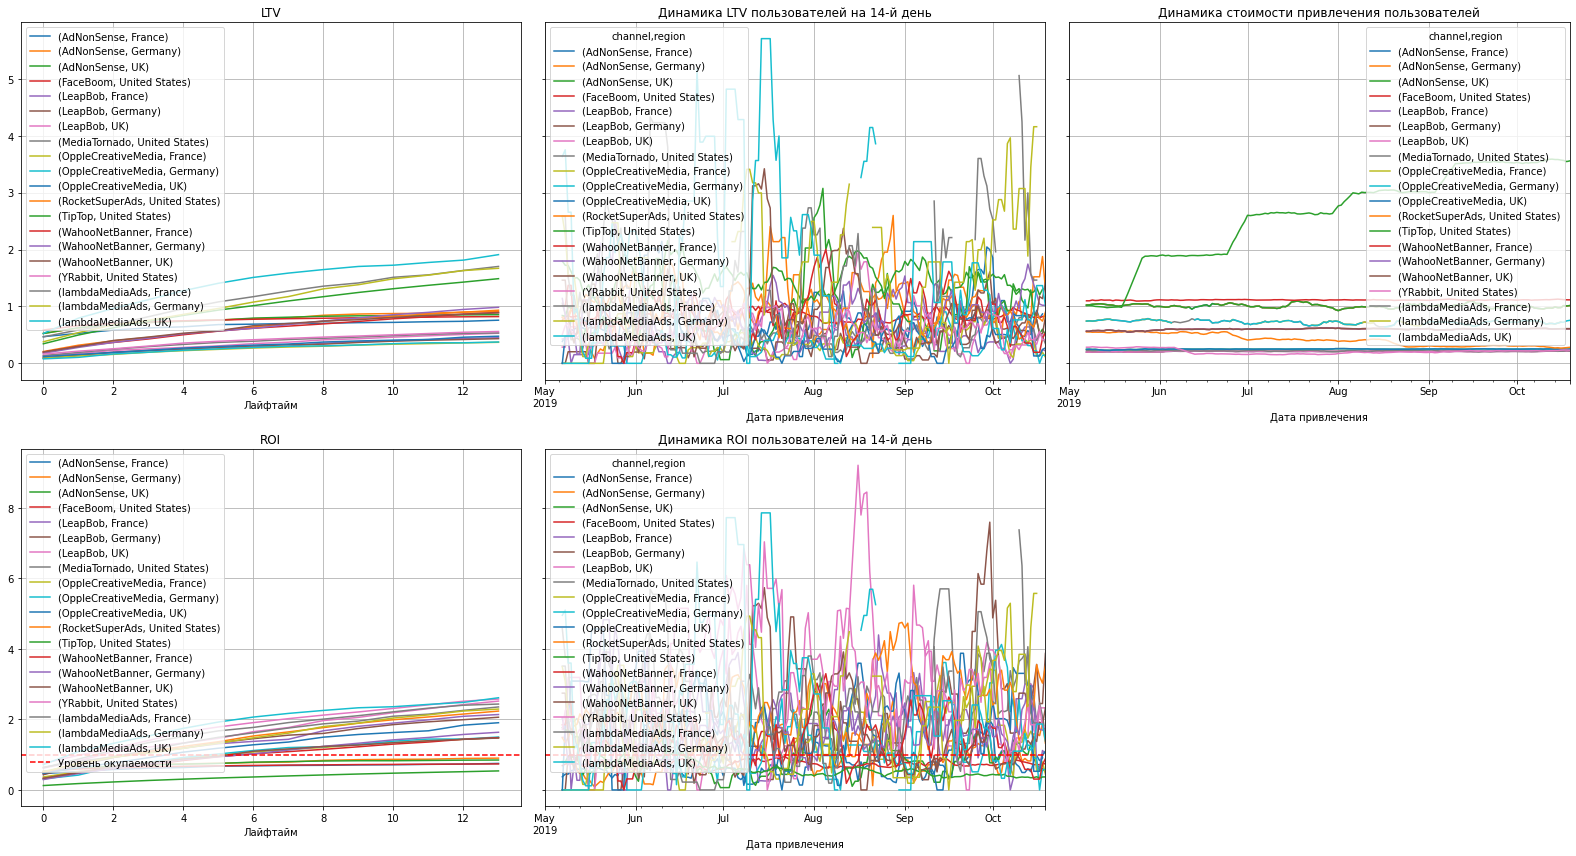

In [39]:
dimensions = ['channel', 'region']
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

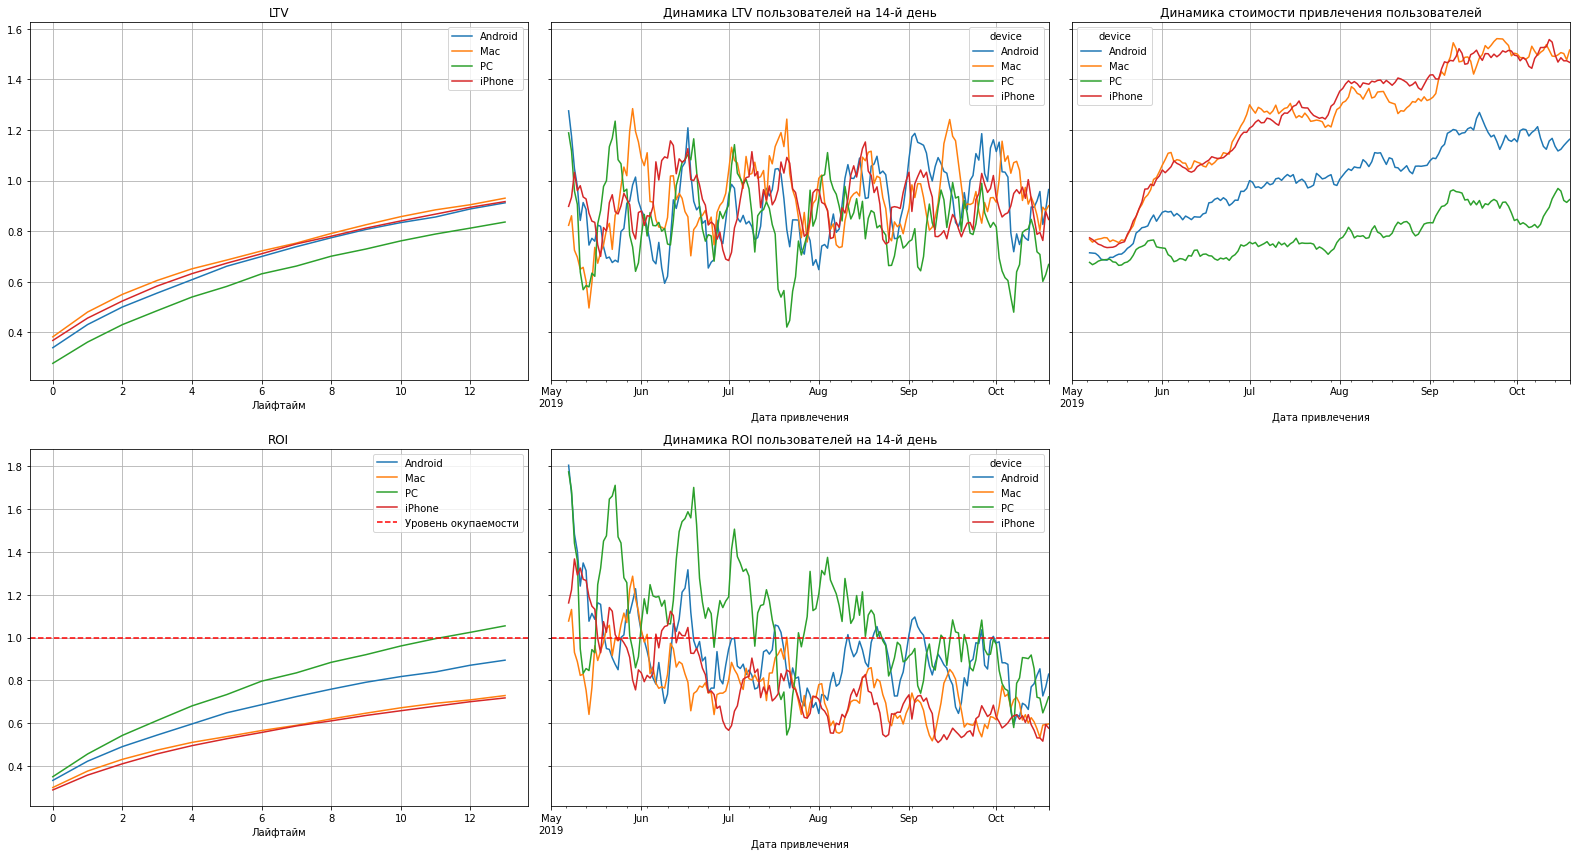

In [40]:
dimensions = ['device']#, figsize=(12, 10)]
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

In [41]:
#plot_ltv_roi #— для визуализации LTV и ROI.
# функция для визуализации LTV и ROI

def plot_ltv_roi_1(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    #plt.figure(figsize=(100, 120))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    #ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(figsize=(22, 20),grid=True)#, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
    plt.figsize=(100, 120)

    # второй график — динамика ltv
    #ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(figsize=(22, 12),grid=True)#, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    #ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(figsize=(22, 20),grid=True)#, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    #ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(figsize=(22, 20),grid=True)#, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    #ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(figsize=(22, 20),grid=True)#, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

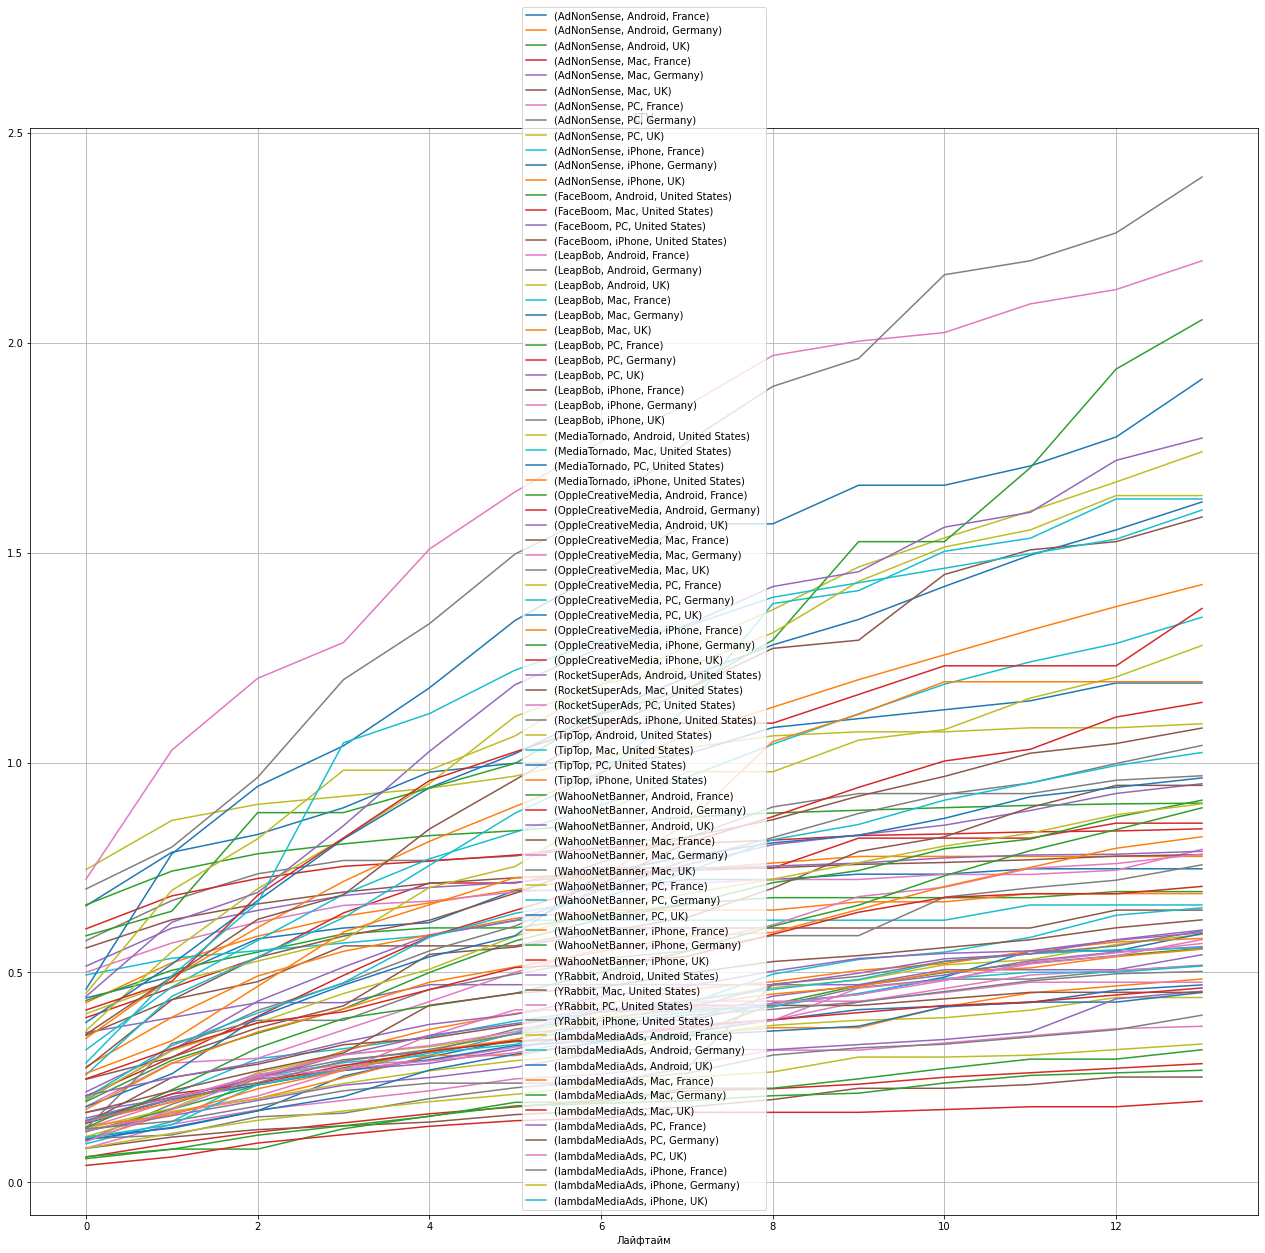

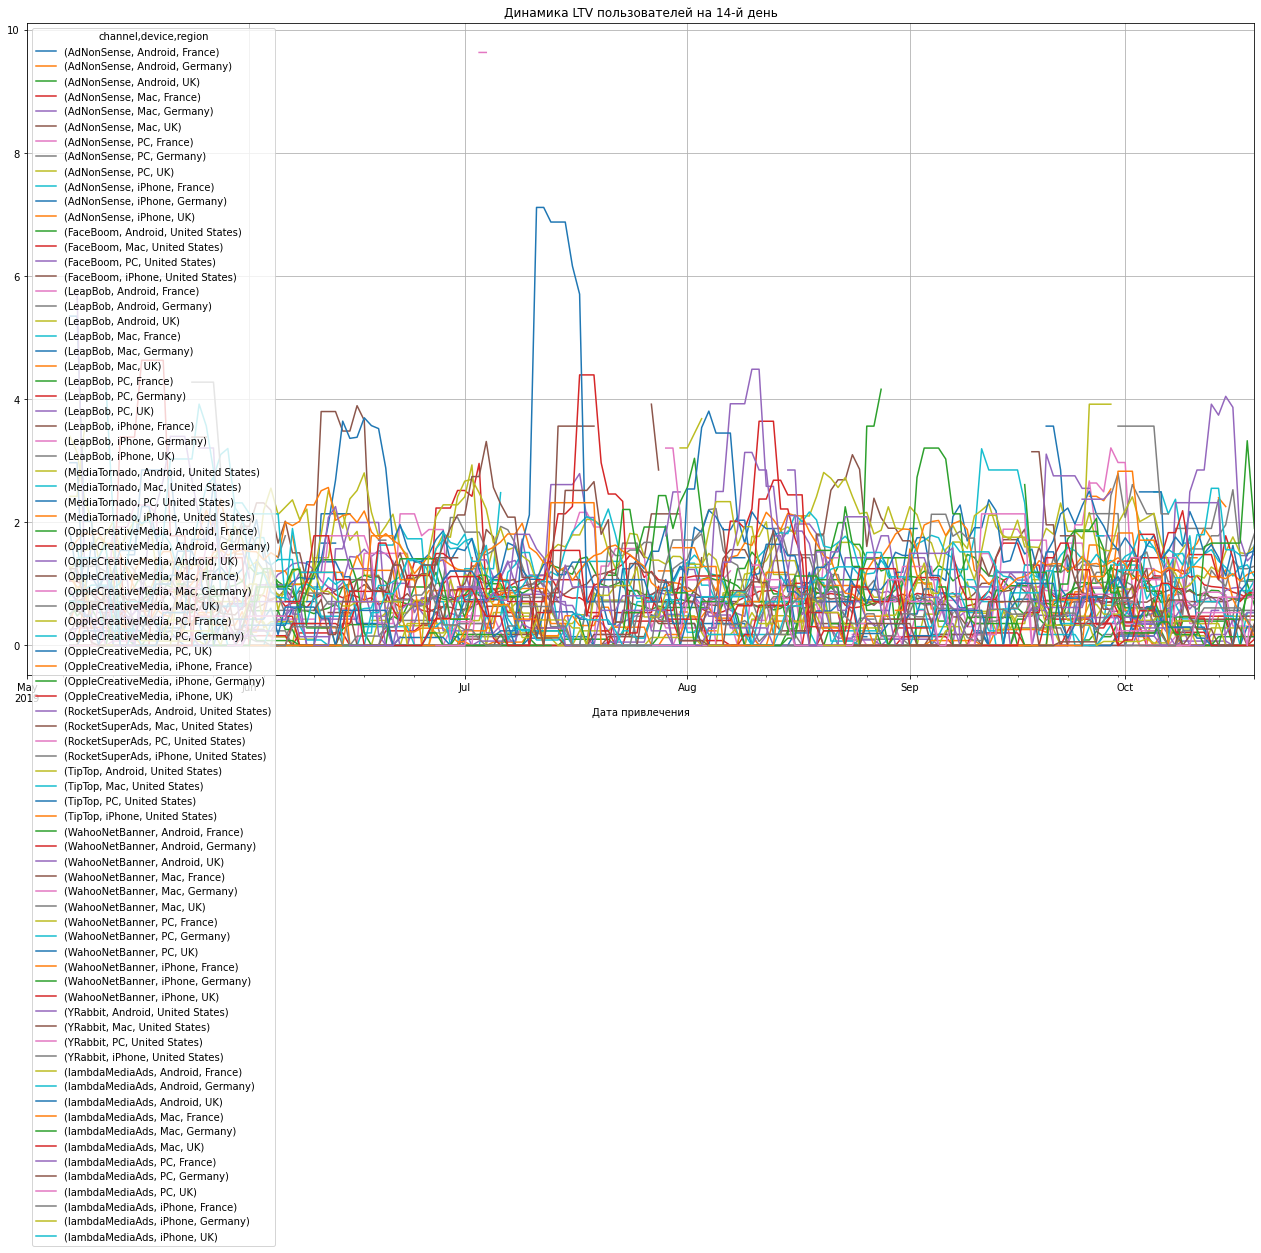

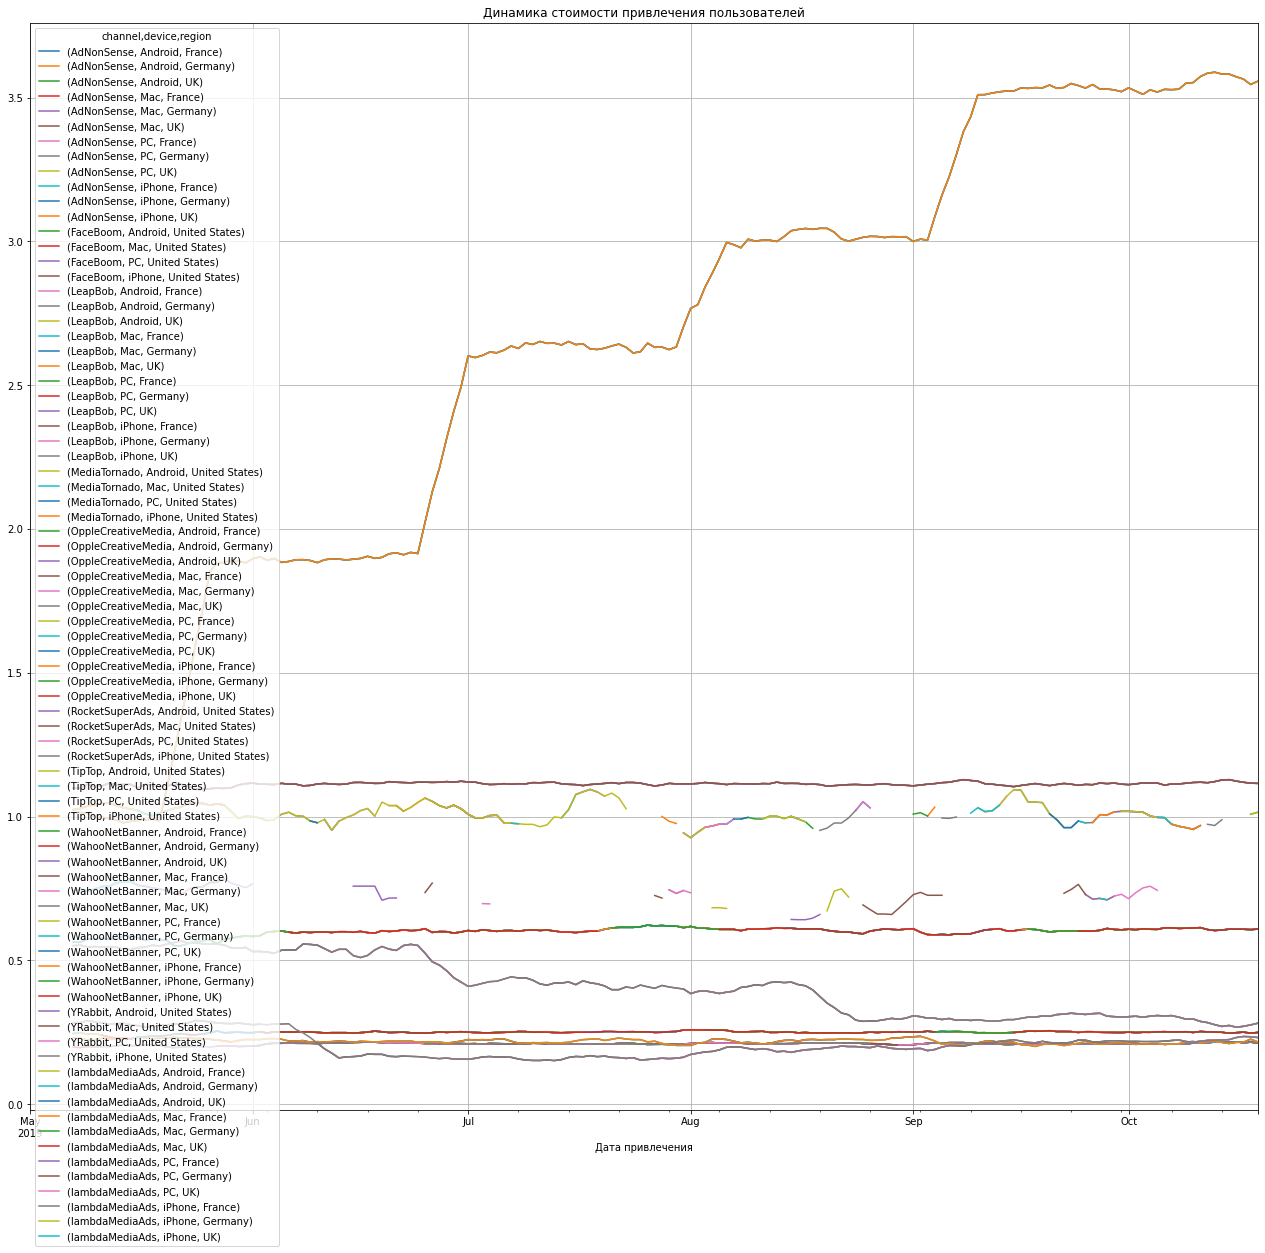

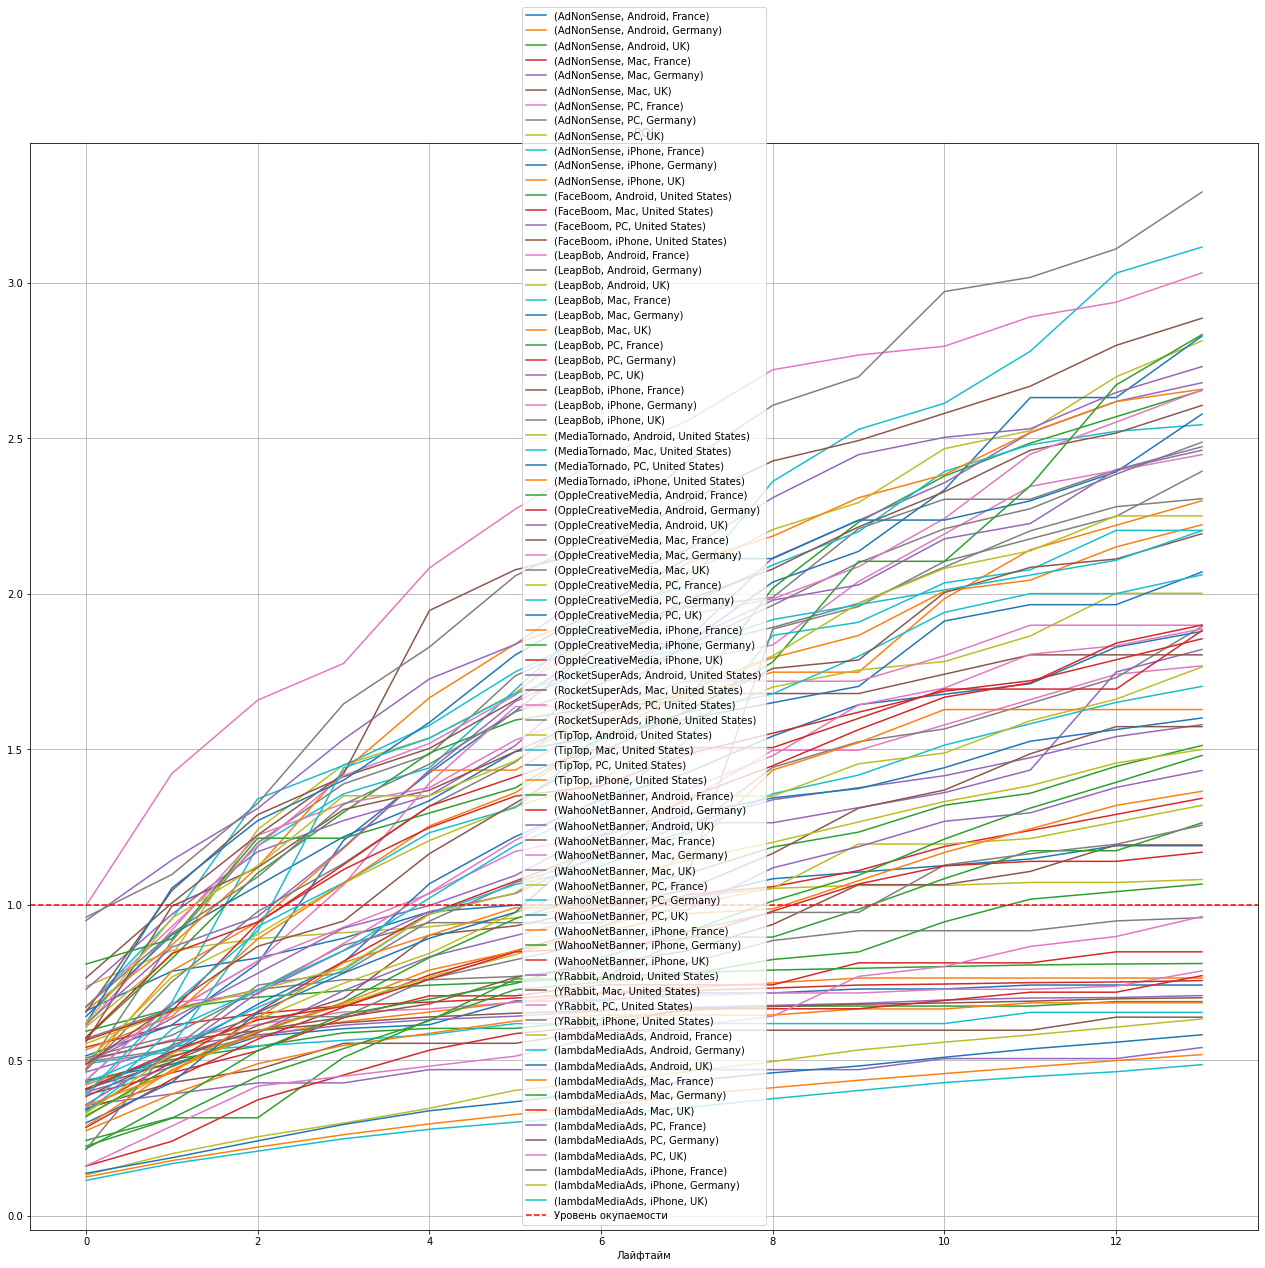

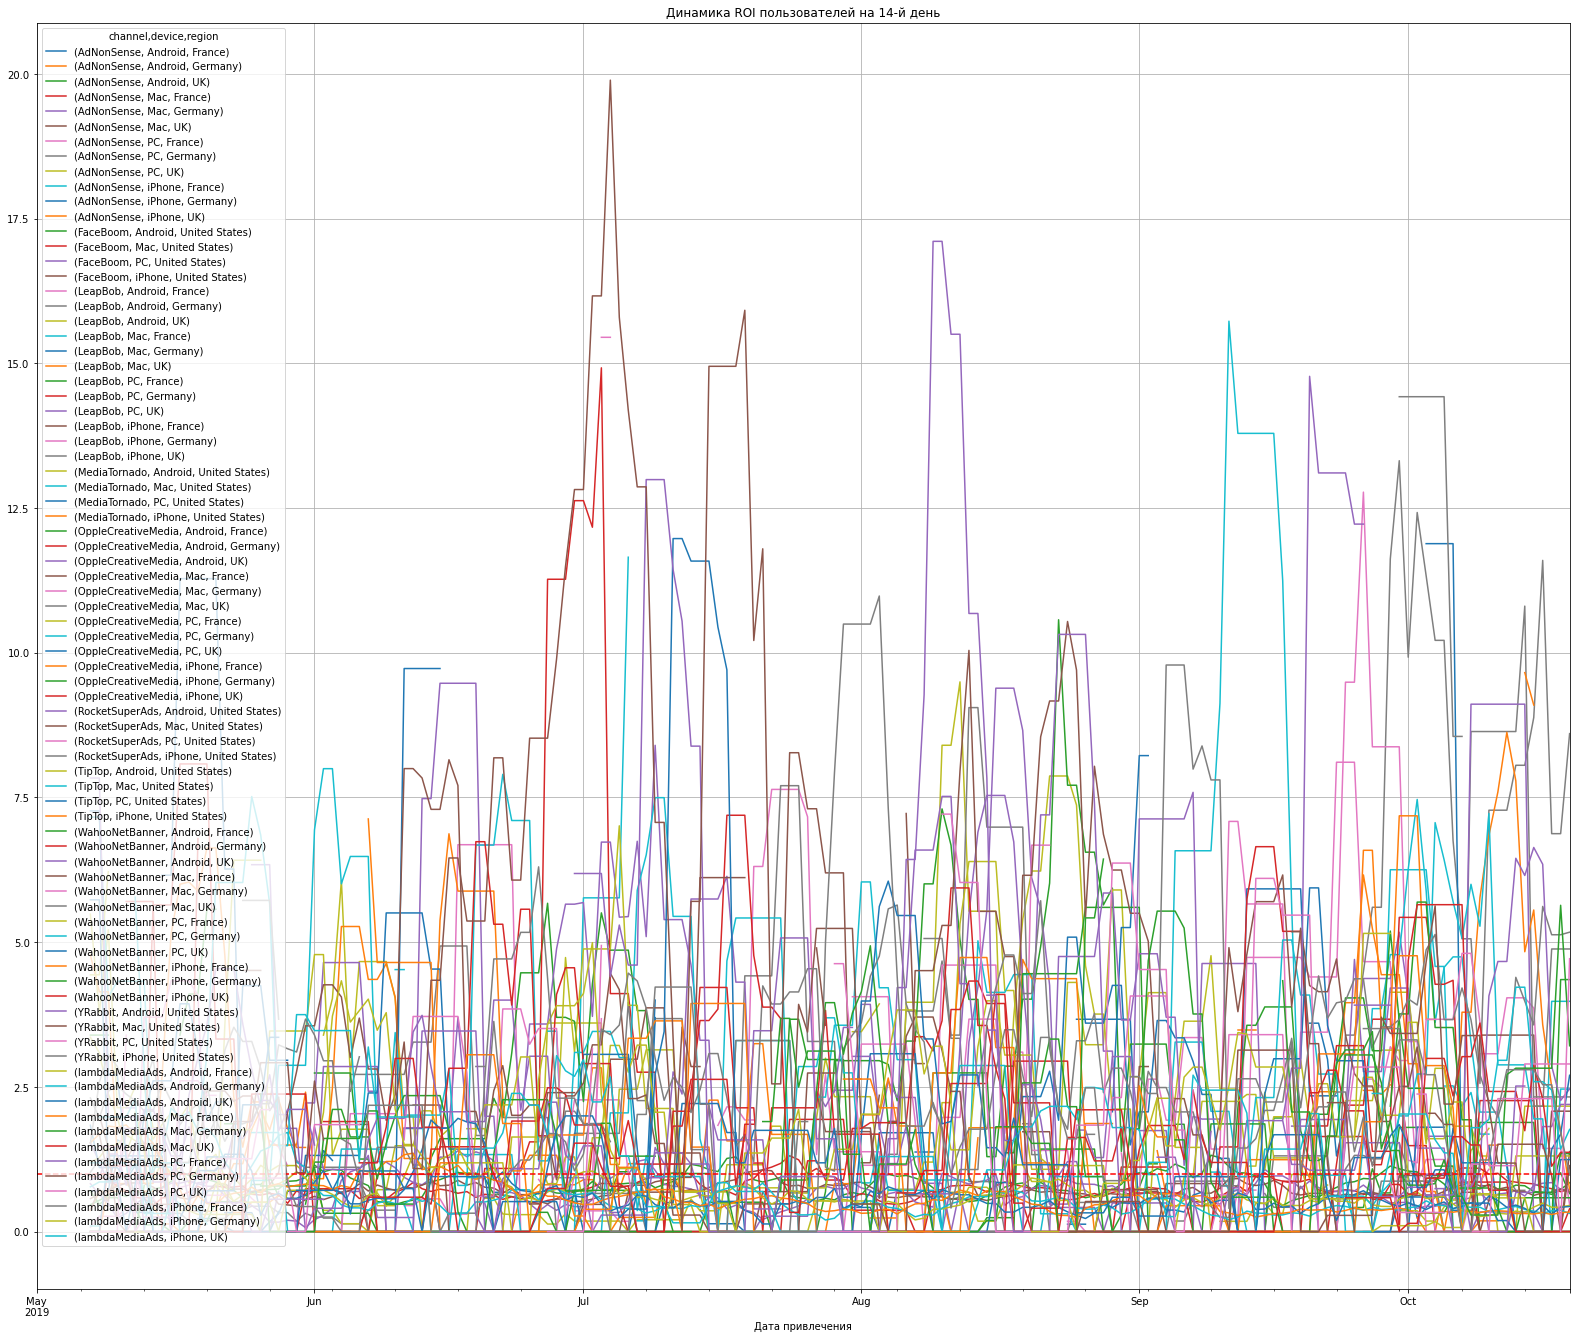

In [42]:
dimensions = ['channel', 'device', 'region']
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики
plot_ltv_roi_1(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

###### выводы
**Прибыль** компании на одного покупателя **LTV растет на всех устройствах**. Для персонального компьютера как устройства первого входа она растет хуже чем для остальных устройств. Динамика нарастающей прибыли на одного клиента на 14-ый день имеет зубчатый вид относительно одной средней линии, как таковой сезонности не наблюдаем.
**Реклама окупается только у пользователей персональных компьютеров** и то на 14-ый день(ROI). **Динамика ROI** на 14-ый день **ухудшается на всех устройствах, скорее всего именно это связано с увеличением рекламного бюджета**. ROI 14-го дня снижается и затухает даже на персональных компьютерах. Это скорее всего связано с увеличением рекламного бюджета и неэффективностью его расходования. **Динамика стоимости привлечения CAC растет на всех устройствах, больше всего она растет на устройствах Mac и IPhone, меньше всего на PC**.
**Вывод**: затраты на рекламу больше всего были на IPhone и Mac, а **окупились только затраты на привлечение пользователей ПК**. Следовательно увеличение затрат влечет за собой снижение окупаемости.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Успешной с точки зрения окупаемостью можно назвать лишь PC. По LTV показатели стабильно растут, но как ты заметила этого мало и в итоге по всему каналам ситуация не очень </div>

#### Проанализируйте окупаемость рекламы с разбивкой по странам. 
Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI: передадим параметру dimensions столбец region.

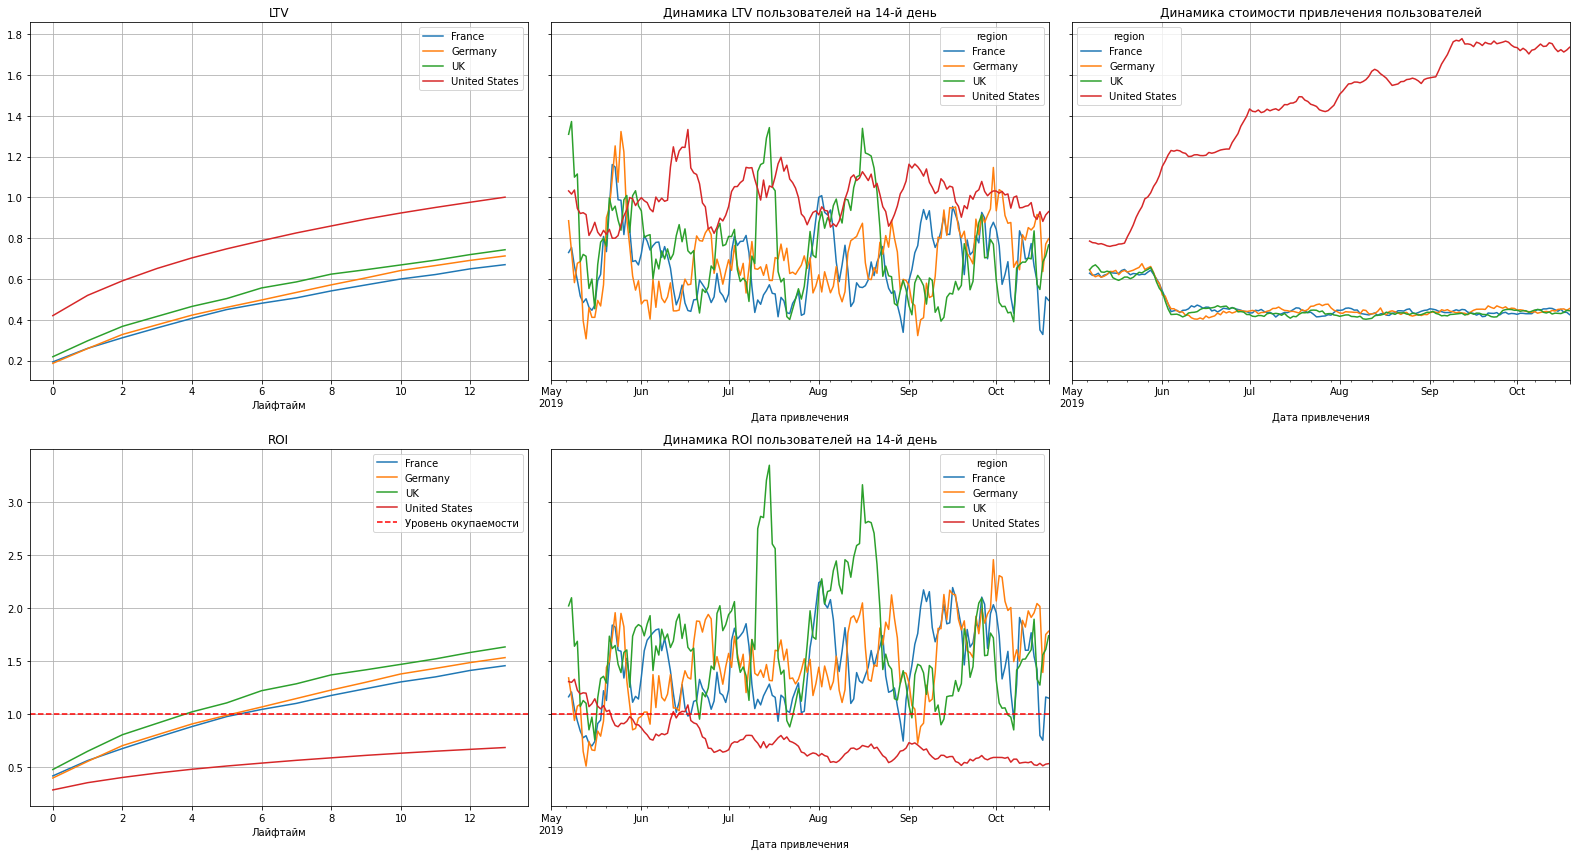

In [43]:
dimensions = ['region']
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

###### Выводы
**LTV** - накопленная прибыль компании на одного пользователя **в США выше чем в странах Европы**.  Динамика этого показателя на 14-ый день имеет пилообразный характер относительно горизонта. График динамики LTV США лежит выше остальных и он имеет меньшую амплитуду. Пики LTV Великобритании и Германии этого графика несколько раз превышают график США в летние месяцы. **Стоимость привлечения в конце мая - начале июня в странах Европы падает до 0,4 и стабилизируется, а в США растет постоянно и ступенчатообразно**. При этом ROI (**окупаемость) в европейских странах** становится выше уровня окупаемости **начиная с 4-5 дня лайфтайма**, а **в США реклама не окупается и на 14 день лайфтайма**. 
**Можно сделать вывод**, что **давая рекламу в США - компания получала покупателей в странах Европы**, поэтому опосредованные затраты на рекламу в Европе не учитываются в ее ROI, а целиком и полностью "зашиты" в ROI США. 
Кроме того уменьшение стоимости привлечение в европейских странах возможно связано с продолжительностью рекламных компаний в Европе оплаченных в начале. В любом случае пики прибыльности на одного покупателя в Европе не могут возникнуть на пустом месте при минимизации или отсутствии затрат на рекламу в Европе. Количество пиков примерно совпадает с количеством пиков на графиках удержания и привлечения причем как в США, так и в Европе. 
Отсюда вывод: **рекламные вложения в США прямо влияют на маркетинговые показатели в европейских странах**. Однако именно из-за этого окупаемость рекламных вложений в США не рентабильна. Взаимовлияние рекламных затрат на LTV в Европе очевидна, но определить насколько американская реклама искажает динамику европейских показателей без дополнительных метрик невозможно. Есть стойкая уверенность что американские каналы имели охват и европейских стран, вопрос лишь в распределении рекламных бюджетов исследуемой компании по странал трансляции рекламы американскими каналами.



<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Все корректно, высокое LTV, низкая окупаемость. Как уже было отмечено выше по проекту по устройствам и отмечу чуть ниже, еще было бы интересно, какая у нас разбивка в привязках страна-устройство-канал, то есть чтобы определить проблему более точечно нам это было бы полезно знать)</div>

#### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


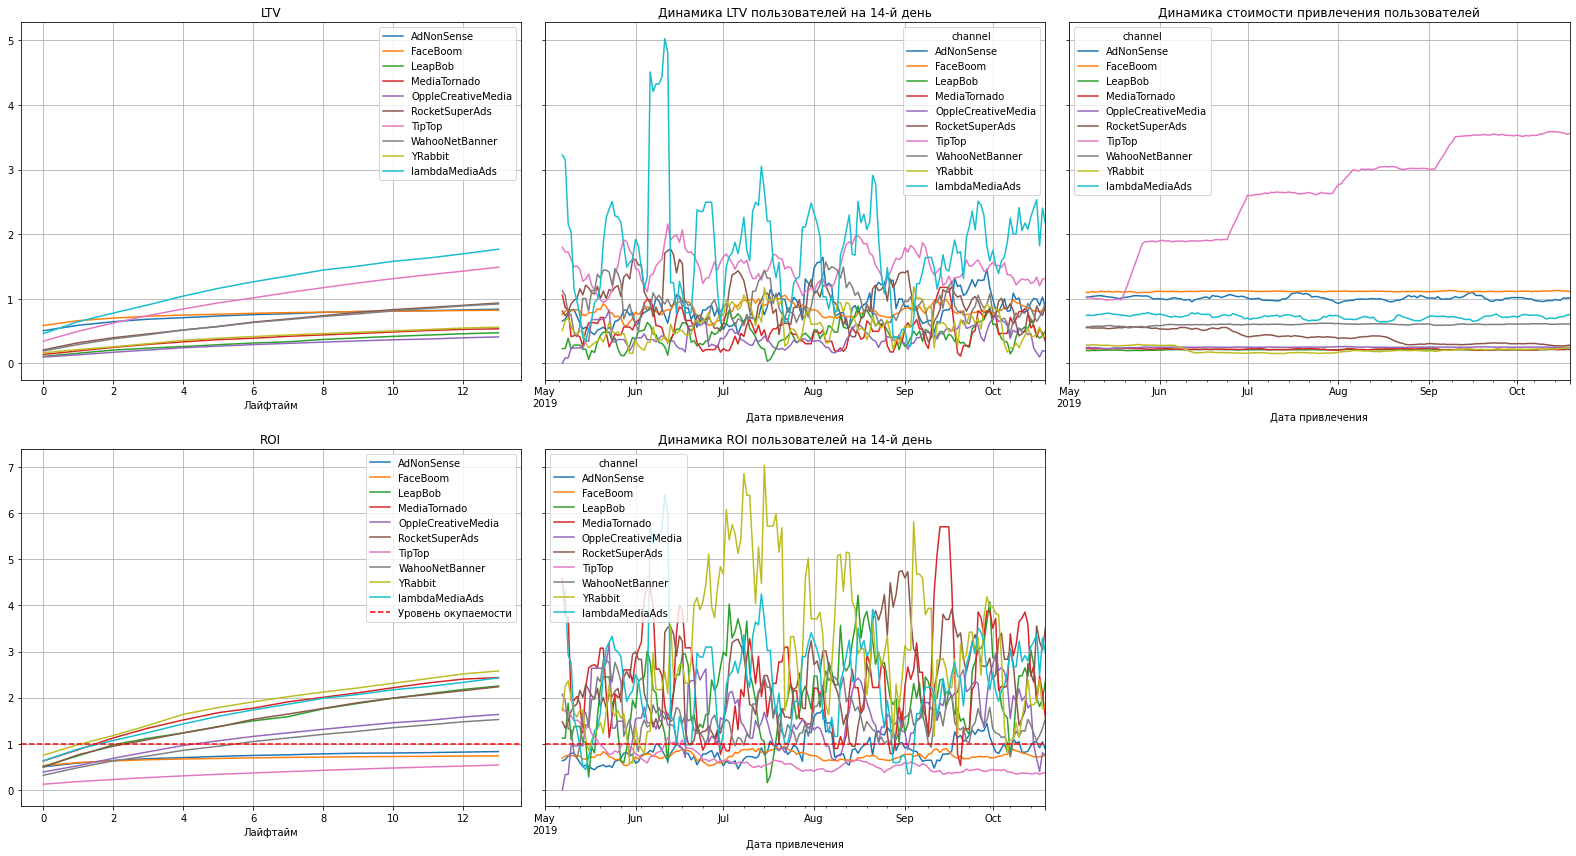

In [44]:
dimensions = ['channel']
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

###### Выводы
**LTV** накопленная прибыль в пересчете на одного покупателя за 14 дней **быстрее всего растет** на таких каналах как **lambdaMediaAds, TipTop и WahooNetBanner**. FaceBoom и AdNonSense LTV имеет старт этого показателя выше, но наклон кривой, а значит скорость накопления ниже. Остальные каналы накапливают прибыль на человека за 14 дней плохо и медленно. 

Самые высокие пики LTV дает сеть **lambdaMediaAds**, причем пики совпадают с незначительными увеличениями в CAC (стоимость привлечения) на этом канале - можно сделать вывод что **незначительные вложения в рекламу на этом канале дают мультиплицирующий эффект на поступление прибыли** от клиентов с этого канала привлечения. 

Канал **TipTop** при увеличении стоимости привлечения клиентов (скорее всего в виде увеличения рекламного бюджета) не дает схожей динамики по прибыли на человека. Скачки есть, а роста аналогичного затратам нет. Можно сделать вывод, что **клиенты, пришедшие с этого канала плохо удерживаются и также плохо покупают**. 

Затраты на привлечение клиентов росли только в сети **TipTop** - это скорее всего китайская сеть коротких видеороликов, локализованная в США, из нее интересные видеоролики вирусятся в другие соцсети за исключением FaceBoom. Можно предположить, что все другие каналы, распространяющие видео контент и, в том числе и ролики из TipTop, пассивно продвигают контент компании. Поэтому параллельная рекламная компания в таких сетях и дает мультиплицирующий эффект. **Самую сильную связь я вижу с сетью lambdaMediaAds**. 

RocketSuperAds - источник в который почти не вкладывался рекламный бюджет и он дважды падал в конце июля и в конце августа, но она тоже выдавала пики в 14-ый день лайфтайма. Это может быть связано с дискретностью выдачи рекламы компании в этом источнике или с рекламой в TipTop.  

**ROI ниже уровня окупаемости у трех каналов: TipTop. FaceBoom и AdNonSense**. **WahooNetBanner и OppleCreativeMedia** - эти 2 канала **окупались в течении 5 дней**, остальные каналы выходили на окупаемость за 1-3 дня. **Лучше всех дело обстоит у канала YRabbit, реклама на этом канале окупалась за 1 день и к 14 дню достигала 250%**. 

Динамика окупаемости рекламных затрат показала что сеть YRabbit в июле давала пики до 700%, lambdaMediaAds до 580%, MediaTornado до 530%. При этом стоимость привлечения в этих каналах стабильно низкая.  

При этом высокозатратные сети TipTop, FaceBoom и AdNonSense - стабильно ниже уровня окупаемости на 14-ый день лайфтайма.
**Могу предположить что без имиджевой рекламы в крупных и дорогих каналах TipTop, FaceBoom и AdNonSense не было бы отдачи от остальных каналов**.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, соглашусь, тут хорошо также на самом уровне продукта опредила закономерности и отметила, что дорогие каналы при такой низкой окупаемости имело бы смысл вовсе убрать, даже с учетом того, что наверное они и тянут органику</div>

#### Окупается ли реклама, направленная на привлечение пользователей в целом?

**В целом реклама не окупается** - см. вы воды выше при рассчете показателей без учета органических пользователей. 

Если же мы добавляем органических пользователей - то на 14 день лайфтайма мы выходим на окупаемость. Если бы затраты на привлечение не увеличивались так стремительно, то ROI в динамике бы тоже не падал и маркетинговый отдел компании достиг бы показателей окупаемости из бизнес-плана компании.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, выше все исчерпывающе описано) Без органики все очень плохо, с органикой просто плохо</div>

### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

#### Конверсия пользователей с разбивкой по устройствам

Проверим конверсию пользователей и динамику её изменения с разбивкой по устройствам. Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion() и передав параметру dimensions столбец device:

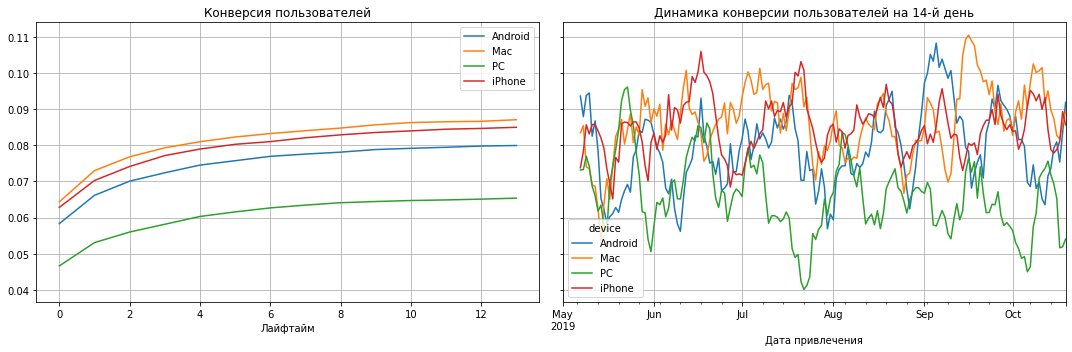

In [45]:
dimensions = ['device']
# смотрим конверсию с разбивкой по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    ad_profiles, orders, observation_date, horizon_days, dimensions = dimensions 
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

###### Вывод: 
**Конверсия** покупателей привлеченных за счет рекламного бюджета **выше всего на девайсах Mac**, немного хуже на IPhone. **Хуже всего обстоит дело с конверсией на персональных компьютерах**, она на 26% ниже на 14 день лайфтайма. Если сопоставить с САС на этих же девайсах, то разница будет в 50%. Затраты на привлечение на Android на 20% ниже, а конверсия всего на 10% с того же устройства.

**Таким образом низкие затраты напрямую не существенно сказываются на привлечении пользователей через девайсы. Поэтому можно сократить рекламу на девайсах компании Apple**.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Тут тоже, как и в табличке с долей платящих было бы полезно знать, как устройства привязаны к странам, вероятно Apple хорошо конвертируется не просто так)</div>

#### Удержание пользователей с разбивкой по устройствам 


Проверим удержание пользователей и динамику его изменения с разбивкой по устройствам. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель,передав параметру dimensions столбец device:

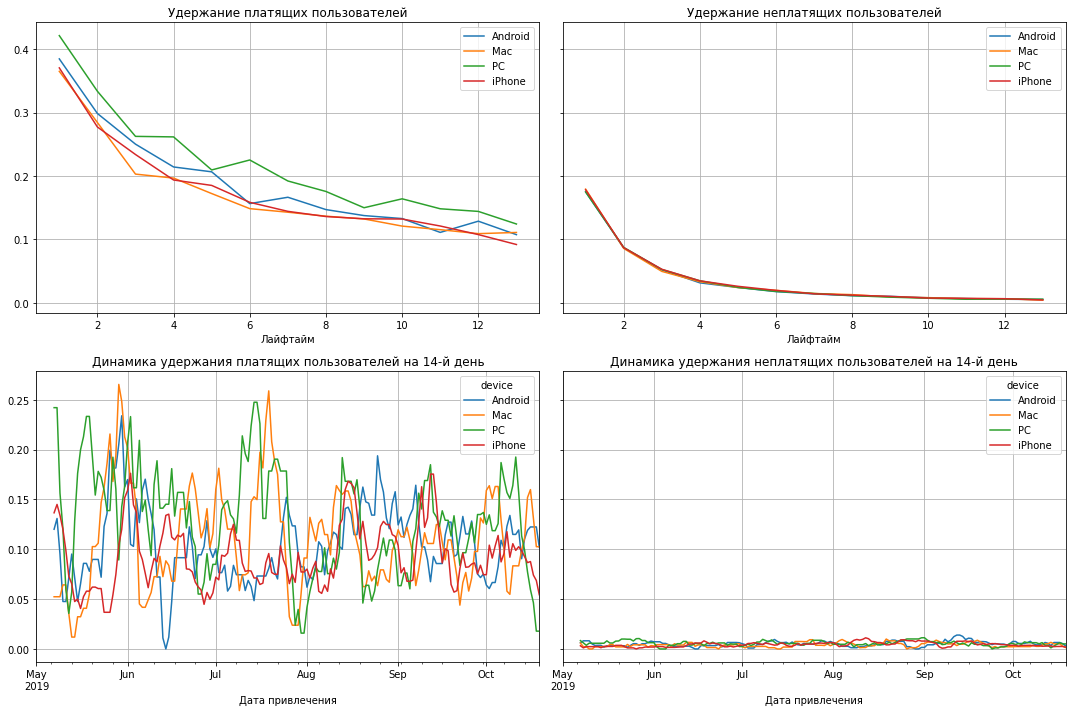

In [46]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    ad_profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

###### Вывод:
**Удержание пользователей лучше на устройствах PC и он выше чем на устройствах компании Apple на 30%**. В динамике **удержание лучше на 14 день лайфтайма у девайсов PC и Mac**. Возможн это связано с отсутствием мобильности устройств. Тогда с целью удержания клиентов лучше ориентироваться на эти 2 типа устройств. Есть затухание амплитуды удержания в течении эксперимента, значит большие вливания в рекламу увеличивает прогнозируемость отклика рынка.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> По удержанию в устройствах в целом нет существенных выбросов, которые бы критически повлияли на всю кампанию. Однако, при этом всё равно ты детально описала все графики и отметила особенность удержания для пользователей ПК</div>

#### Конверсия и удержание пользователей с разбивкой по странам

Конверсия пользователей с разбивкой по странам 
- Проверим конверсию пользователей и динамику её изменения с разбивкой по странам. Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion() и передав параметру dimensions столбец region:

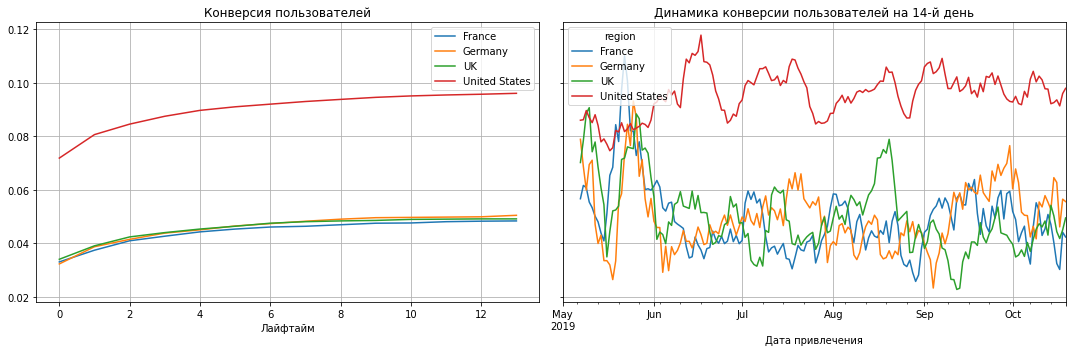

In [47]:
dimensions = ['region']
# смотрим конверсию с разбивкой по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    ad_profiles, orders, observation_date, horizon_days, dimensions = dimensions 
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

###### Вывод: 
Конверсия и удержание пользователей с разбивкой по странам
**Конверсия в США в 2 раза больше чем в европейских странах**, кривая динамики имеет меньшую амплитуду, В Европе есть пик конверсии в середине мая, в Великобритании в середине августа в Германии в конце сентября. **Конверсия на 14 день лайфтайма в США в среднем выше на 78%**

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Как мы уже видели по табличке с долей платящих с конвертацией у нас по США все в порядке)</div>

#### Удержание пользователей с разбивкой по странам

Проверим удержание пользователей и динамику его изменения с разбивкой по странам. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель,передав параметру dimensions столбец region:

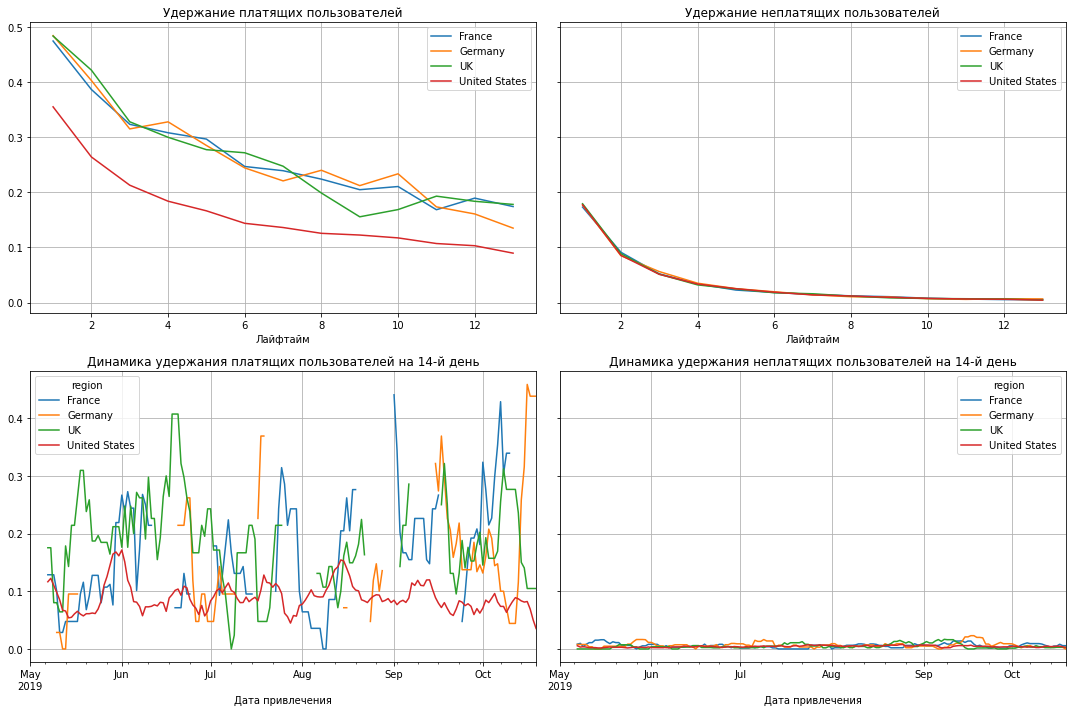

In [48]:
# смотрим удержание  с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    ad_profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

###### Вывод: 
**Удержание платящих пользователей США ниже** на 0,1 чем у европейских стран, то есть в США компания ужерживала **на 20-50% хуже** чем в Европе (начало и конец эксперимента)
Только кривая динамики удержание платящих пользователей на 14-день в США имеет непрерывный характер. Кривые остальных стран имеют разрывы. Меньше всего разрывов у кривой удержания Великобритании, больше всего разрывов в Германии. Получается что **в отдельные периоды в европейских странах вообще не было удержанных пользователей на 14-ый день**, или он просто не доживают до этого лайфтайма. Это свидетельствует о меньшем количестве пользователей из этих стран, и о получившейся дискретности наблюдений из-за этого. Получается что данный временной промежуток эксперимента выбран некорректно. Амплитуда колебаний графика удержаний в европейских странах на 14-ый день в 4,5 раза выше чем в США

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> А с удержанием по Штатам уже возникают проблемы, заметные невооруженным взглядом. Тут молодец, что отметила пункт про разрывы в удержании</div>

#### Конверсия и удержание пользователей с разбивкой по каналам

Конверсия пользователей с разбивкой по каналам
Проверим конверсию пользователей и динамику её изменения с разбивкой по каналам. Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion() и передав параметру dimensions столбец channel:

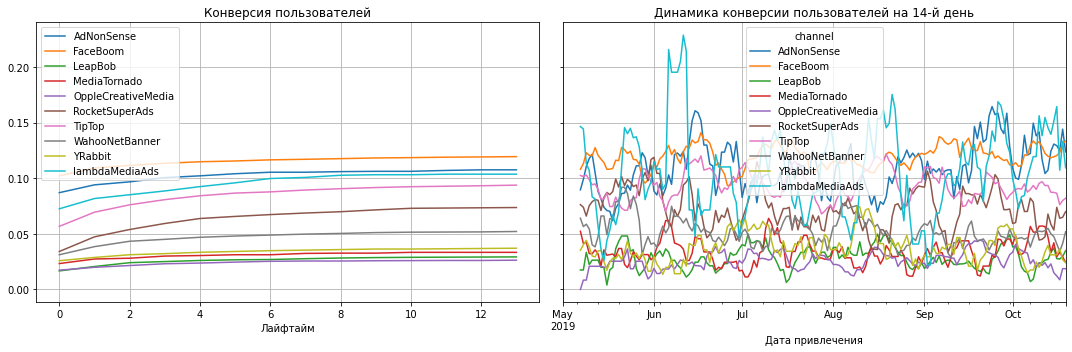

In [49]:
dimensions = ['channel']
# смотрим конверсию с разбивкой по каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    ad_profiles, orders, observation_date, horizon_days, dimensions = dimensions 
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

###### Вывод: 
**Самая высокая конверсия пользователей через канал FaceBoom(0,12) и AdNonSense(0,11)**, Далее следуют по уровню **конверсии lambdaMediaAds(0,1), TipTop(0,09) и RocketSuperAds(0,074) WahooNetBanners(0,05)**. Остальные каналы имеет конверсию порядка 0,04.
**Характерно то что на 6-ой день лайфтайма все кривые конверсии стабилизирубтся в прямые**. 
В динамике на 14 день лайфтайма FaceBoom и TipTop имеют самые сглаженные кривые из заметных на графике. Маленькие каналы с низкой конверсией тоже обладают низкой амплитудой колебаний, но это скорее от малого числа пользователей пришедших через эти каналы. Из высокоамплитудных каналов можно отметить lambdaMediaAds(амплитуда (0,2), AdNonSense (0,09) и RocketSuperAds(0,08) - возможно рекламные компании в этих сетях были кратковременные, массированные и не часто, поэтому конверсия имеет такие колебания. **Явного затухания конверсии во всех каналах не наблюдается.**


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И тут снова дополню, что если ты обратишь внимание самые конвертируемые каналы = самые дорогие, может быть тут есть какая-то параллель с устройствами или странами?)</div>

#### Удержание пользователей с разбивкой по каналам
Проверим удержание пользователей и динамику его изменения с разбивкой по каналам. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель,передав параметру dimensions столбец channel:

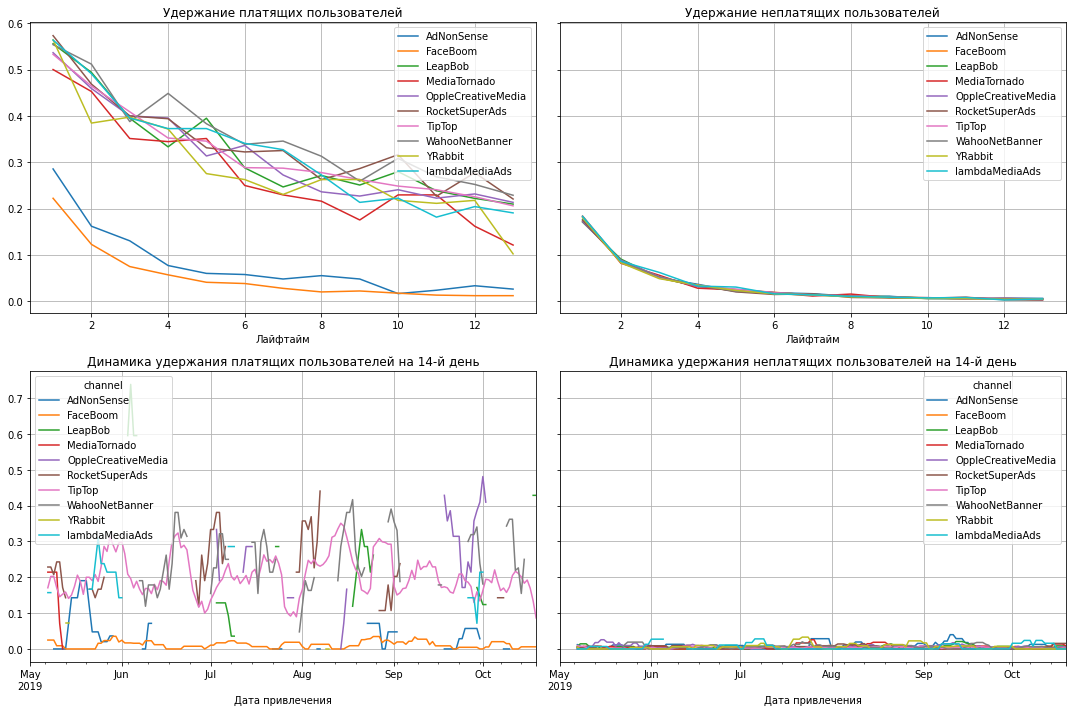

In [50]:
# смотрим удержание  с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    ad_profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

###### Выводы: 
**Самый низкий уровень удержания платящих пользователей через канал FaceBoom(0,22 - 0) и AdNonSense(0,29 - 0)**. У **остальных каналов уровень удержания в среднем падает от 0,55 до 0,2**.  
На графике динамики непрерывны лишь 2 линии FaceBoom и TipTop. Остальные как и в случае с удержанием по странам **имеют рваный характер. Таким образом можно предположить, что во всех каналах кроме FaceBoom и TipTop реклама давалась дискретно и на определенные страны, несмотря на такую рекламную политику платящие клиенты удерживались гораздо лучше чем в FaceBoom и TipTop**.
Удержание TipTop намного выше чем FaceBoom. 
Получается что **лишь рекламные вложения в TipTop стабильно хорошо удерживали платящих пользователей**.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> При такой огромной цене кажется очень плачевно, что эти каналы настолько плохо удерживаются, хоть и стабильно) Тут тоже отметила все всплески в разрезе самих каналов привлечения, указав, что сама суть стратегии была видимо подобрана неудачно</div>

#### Выводы по п. 5: Оценив окупаемость рекламы, можно сделать такие выводы:
- В целом **реклама**, направленная на привлечение платящих пользователей, **не окупается**.
- **Расходы на рекламу для пользователей Mac и iPhone можно уменьшить**, эти устроиства и без того приводят в сервис много пользователей, но надо **обратить внимание на удержание пользователей на этих устройствах** (рекомендуется выяснить причину слабого удержания). Также крайне **негативное влияние на окупаемость оказали рекламные компании в США и реклама в канале TipTop**. Расходы на эти рекламные компании также **рекомендуется сократить** или при подаче рекламы выбирать регион не только США.
- Для увеличения окупаемости можно **провести мероприятия по увеличению удержания пользователей проживающих в США и приходящих через рекламные компании в FaceBoom и AdNonSense**: выяснить проблемы, с которым сталкиваются пользователи при использовании сервиса.
- Также **для привлечения большего количества пользователей можно увеличить количество рекламных компаний в канале YRabbit**, т.к. в рассмотренном периоде он оказался самым прибыльным в расчете на одного пользователя, при этом привлек относительно небольшое число клиентов. Также рекомендуется давать рекламу в **RocketSuperAds, MediaTornado, LeapBob** так как они весьма эффективны при малых вложениях.


#### Конверсия и удержание по макрорегионам

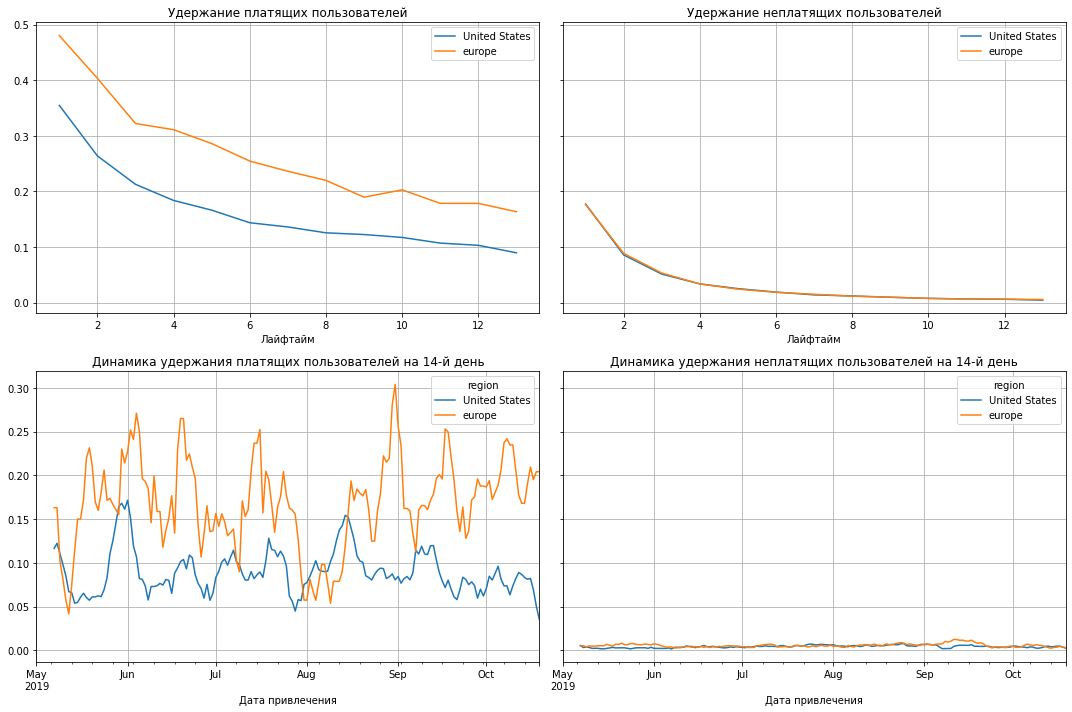

In [51]:
# смотрим удержание  с разбивкой по макрорегионам - США и Европа

ad_profiles['region'] = ad_profiles['region'].replace(['France', 'UK', 'Germany'],'europe')
dimensions =['region']  
#display(ad_profiles['region'].unique())
retention_raw, retention_grouped, retention_history = get_retention(
    ad_profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

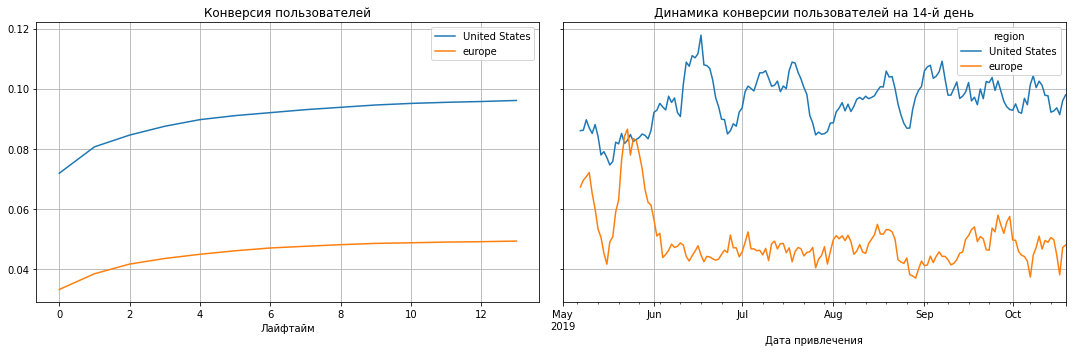

In [52]:
#dimensions = ['region']
# смотрим конверсию с разбивкой по  макрорегионам - США и Европа
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    ad_profiles, orders, observation_date, horizon_days, dimensions = dimensions 
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Верно агрегировала все выводы из раздела окупаемости рекламы, а еще исходя из общих проблем Штатов было бы интересно посмотреть например на бизнес-показатели в разрезе США-Европа или еще как вариант попробовать посмотреть на общие показатели без трех лидеров по тратам в кампании

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Классное дополнение графиками и выводами, так отличие США стало еще более наглядным

###### Вывод
если рассмотреть 2 макрорегиона - США и Европа, то конверсия в США в 2 раза выше чем в Европе, а удержание в Европе больше на 70%. То есть для создания постоянных каналов плательщиков больше подходит регион Европа.
Причем, в середине мая конверсия была равной, но потом в увеличением бюджета в США конверсия в Европе просела. Динамика же удердания в Европе проседала лишь в начале августа и до уровня США, в остальное врямя она была значительно выше. Возможно это связано с отпускным периодом в Европе.

### Шаг 6. Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

#### Выделите причины неэффективности привлечения пользователей.

Разберем причины неэффективности привлечения пользователей компании выпускающей приложение Procastinate Pro+. Для этого мы провели исследовательский анализ взяв данные о посещениях сайта, стоимости рекламных затрат и данные покупок пользователей.
Рассмвтривались пользователи, привлеченные на сайт с 1 мая 2019 года до 27 октября 2019 года.
Рзультаты исследования:
**Больше всего платящих пользователей из США, пришли через канал FaceBoom и используют девайсы Mac**.  
**Больше всего посетителей** пришло через бесплатное привлечение по естественным каналам, обозначенные как **Organic**, однако и **конверсия** в покупателей через этот канал **самая низкая**. **Минимальная конверсия в покупателей во Франции, в абсолютном выражении минимум покупателей пришло из Германии**. С другой стороны **Германия показала самую большую долю платящих клиентов из всех Европейских стран и вложения в эту страну оказались эффективными**.
**Покупатели и посетители сайта сайта предпочитают мобильные устройства iPhone и Android**. **Максимальная конверсия в платящих клиентов у пользователей Mac**. В абсолютных цифрах меньше всего покупателей пришли через персональные компьютеры.
**Максимальное число посетителей и покупателей дал канал FaceBoom. Худшим каналом по количеству платящих пользователей оказался MediaTornado**. **Худшим по конверсии оплачиваемых каналов стал канал OppleCreativeMedia**. Вложения в эти 2 последние каналы были неэффективны.
Общая сумма рекламных затрат 105497, общая выручка 215962.88.  Больше всего денег потратили на рекламные компании **TipTop и FaceBoom, при этом их совместный рекламный бюджет составляет более 82%**. Самыми **дешевыми оказались рекламные компании YRabbit**. Самыми **"дорогими" стали пользователи, привлеченные через рекламные компании TipTop**. Среди **пользователей, пришедших благодаря рекламе, дешевле всего обошлось привлеченние одного пользователя через канал Leapbob**.
Медианная **стоимость привлечения покупателей в TipTop в 3 раза превышает CAC во втором по бюджету канале FaceBoom**. 
Если оценить **процент конвертации в покупателей к затратам на привлечение - то самым эффективным каналом привлечения окажется RocketSuperAds**, также **перспективными** будут вложения в каналы **YRabbit, MediaTornado и LeapBob**.
Рассмотрев 2 варианта с посетителями пришедшими естественным путем и без мы получили 2 разных результата. Если учитывать покупателей из канала **Organic**, то проект вышел на окупаемость к 14-му дню лайфтайма. Однако в задании надо оценить эффективность вложения в рекламу, для привлечения пользователей поэтому посетителей и покупателей из этого канала **в дальнейшем мы не учитываем**.
Исключив из анализа органических пользователей, и установив горизонт анализа 2 недели - выполнили оценку окупаемости рекламы о эффективности привлечения. С помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI обнаружили, что: **реклама не окупается, затраты на привлечение сильно увеличились за время  эксперимента**. Значит, **проблема** окупаемости может быть **связана с увеличением рекламного бюджета**. Проверив конверсию пользователей и динамику её изменения, выяснили, что **в целом пользователи конвертируются хорошо, причём постоянно**. Пользователей **Mac и IPhone, проживающие в США и приходящие через рекламные компании в FaceBoom и AdNonSense обладают самой высокой конверсией,  но хуже всего удерживаются**, значит привлечение таким образом не эффективно. 
Проанализировали окупаемость рекламы с разбивкой по устройствам, странам и каналам привлечения выяснили, что: 
**Стоимость привлечения в конце мая - начале июня в странах Европы падает до 0,4 и стабилизируется, а в США растет постоянно и ступенчатообразно**. При этом **ROI (окупаемость) в европейских странах становится выше уровня окупаемости начиная с 4-5 дня** лайфтайма - значит это эффективно привлекать пользвателей в Европе, **а в США реклама не окупается и на 14 день** лайфтайма - это не эффективно. Предполагаем, что переключение рекламного бюджета на США связано с американской юрисдикцией каналов, которые имеют покрытие на весь мир.
• **В трех источниках: TipTop, FaceBoom и AdNonSense - привлечение не эффективно, реклама не окупается**.
• **CAC** пользователей, привлеченных каналом **TipTop**, сильно **увеличивался от месяца к месяцу**. Значит, **проблема неэффективности привлечения** может быть **связана с неоправданным увеличением рекламного бюджета канала TipTop и неокупаемостью вложений**.
• **Больше всего выручки принесли пользователи, пришедшие благодаря рекламной компании LambdaMediaAds, но самым прибыльным оказался канал YRabbit** - привлечение через эти каналы было эффективным.



#### Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Краткие выводы и рекомендации для отдела рекламы:   
Оценив окупаемость рекламы, можно сделать такие **выводы**:
•	В целом реклама, направленная на привлечение пользователей, не окупается из-за слишком больших трат на привлечение клиентов. Поэтому **рекламный бюджет  надо оптимизировать**.
•	**Расходы** на рекламу для пользователей **Mac и iPhone можно уменьшить**, эти устройства и так эффективно приводят в сервис пользователей, но **надо обратить внимание на конверсию пользователей в покупателей на этих девайсах и увеличить удержание** (рекомендуется выяснить причину слабого удержания). Также крайне **негативное влияние на эффективномть привлечения оказали рекламные компании в США и реклама в канале TipTop**. Вложения не окупились продажами. Расходы на эти рекламные компании также **рекомендуется сократить** или при подаче рекламы выбирать регион не только США.
•	- Для повышения эффективности можно провести **мероприятия по увеличению удержания пользователей проживающих в США и приходящих через рекламные компании в FaceBoom и AdNonSense**: выяснить проблемы, с которым сталкиваются пользователи при использовании сервиса.
•	- Также для привлечения большего количества пользователей можно **увеличить количество рекламных компаний в маленьких каналах например YRabbit**, т.к. в рассмотренном периоде он оказался самым прибыльным в расчете на одного пользователя, при этом привлек относительно небольшое число клиентов. Также рекомендуется давать рекламу в **RocketSuperAds, MediaTornado, LeapBob** так как они весьма эффективны при малых вложениях.


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Замечательно! Ты сформулировала понятные выводы по проекту и логичные рекомендации менеджерам, собрав все выводы из раздела анализа рекламы и частично собрав их из первых разделов. Единственное, сейчас в выводах и рекомендациях почти половина текста выделена цветом, лучше акцентировать внимание только на самом важном и еще желательно выделять мысли из схожей категории пунктами, например так:
    
* 
    
* 
    


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Рекомендации:
    
По сути своей весь анализ в этом спринте в той или иной мере основан на когортном анализе, прикреплю полезные ссылки на него. Но на самом деле очень советую в целом полистать gopractice, там очень хорошо описаны все бизнесовые и продуктовые метрики, этот курс часто приводят в пример для продуктовых аналитиков.

https://blog.ohmystats.com/cohort-analysis/
    
https://gopractice.ru/cohort_analysis/
    
https://smysl.io/blog/pandas-cohorts/</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Елена, проект отличный! У тебя очень сильные аналитические навыки, владение инструментами для проведения исследования и навыки продуктовой аналитики. Но всё же у меня есть пара замечаний:
    
* нужно дополнить цель проекта;
    
* добавить графики трат по неделям и месяцам;
    
и я попрошу тебя исправить их, чтобы проект стал еще лучше! </div>